In [1]:
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append('../src')
from utils import *
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import scipy.stats as stats
from stochastic_search import StochasticSearch
import scipy as sp
from scipy.stats import pearsonr,binom,linregress
from ast import literal_eval
import json

/export/raid1/home/ojeda040/miniconda3/envs/SS_UC/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# Used in CCN
# folder   = "SCS UC 10:250:5 0.6 Exp3 AE Fixed copy"
# log_path = "/export/raid1/home/kneel027/Second-Sight/logs/" + folder + "/statistics_df_60.csv"


# Second Sight
subject = 1
folder = "dataframes"
experiment = "Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter"
directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_all_images_897.csv"

# Brain Diffuser
# subject = 1
# folder = "dataframes"
# experiment = "Brain Diffuser regen"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

# Tagaki
# subject = 1
# folder = "dataframes"
# experiment = "Tagaki"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

# Mind Diffuser
# subject = 1
# folder = "dataframes"
# experiment = "Mind Diffuser"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

# Cortical Convolutions
# subject = 1
# folder = "dataframes"
# experiment = "Cortical Convolutions"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

df = pd.read_csv(directory_path)
df.head(100)

#   0 --> Ground Truth
#   1 --> VDVAE Distribution        (Decoded Distribution)
#   2 --> Clip Distrubituon         (Decoded CLIP Only)
#   3 --> Clip Distrubituon + VDVAE (Decoded CLIP + VDVAE)
#   4 --> iter_0
#   5 --> iter_1
#   6 --> iter_2
#   7 --> iter_3
#   8 --> iter_4
#   9 --> iter_5
#  10 --> Search Reconstruction

# {"clip_distribution" : 1, "vdvae_distribution" : 2, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}


,Unnamed: 0,ID,Sample Count,Batch Number,Search Reconstruction,Sample Indicator,Strength,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,...,SSIM,Pixel Correlation,CLIP Cosine,CLIP Two-way,AlexNet 2,AlexNet 5,AlexNet 7,Inception V3,EffNet-B,SwAV
0,0,20,0.0,NaN,NaN,1,0.918611,0.546172,0.586611,0.660595,...,0.237817,0.071933,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20,1.0,NaN,NaN,1,0.908889,0.466043,0.606197,0.661003,...,0.216353,-0.003535,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20,2.0,NaN,NaN,1,0.882500,0.574694,0.580177,0.560036,...,0.198982,0.061388,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20,3.0,NaN,NaN,1,0.831111,0.520219,0.658579,0.663080,...,0.255351,0.183094,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20,4.0,NaN,NaN,1,0.746389,0.586908,0.665912,0.637870,...,0.228081,0.008527,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,20,15.0,1.0,False,6,-4.768889,0.515546,0.732866,0.718467,...,0.227652,0.113087,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,20,16.0,1.0,False,6,-5.903611,0.625140,0.787623,0.828498,...,0.225079,0.107894,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,20,17.0,1.0,False,6,-7.180000,0.678821,0.747998,0.767127,...,0.203883,0.018294,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,20,18.0,1.0,False,6,-8.606389,0.688779,0.802382,0.810721,...,0.230786,-0.050174,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def column_string_to_list(df):
    
    df_new = df
    
    for index, row in tqdm(df.iterrows(), "creating lists"):
        
        df_new.at[index, 'CLIP Two-way']    = json.loads(row['CLIP Two-way'])
        df_new.at[index, 'AlexNet 2']       = json.loads(row['AlexNet 2'])
        df_new.at[index, 'AlexNet 5']       = json.loads(row['AlexNet 5'])
        df_new.at[index, 'AlexNet 7']       = json.loads(row['AlexNet 7'])
        df_new.at[index, 'Inception V3']    = json.loads(row['Inception V3'])
        df_new.at[index, 'EffNet-B']        = json.loads(row['EffNet-B'])
        df_new.at[index, 'SwAV']            = json.loads(row['SwAV'])
        
    return df_new

new_df = column_string_to_list(df)

creating lists: 1794it [01:05, 27.26it/s]


In [12]:
['ID', 'Sample Count', 'Batch Number', 'Search Reconstruction', 'Sample Indicator', 'Strength', 'Brain Correlation V1', 'Brain Correlation V2', 
'Brain Correlation V3', 'Brain Correlation V4', 'Brain Correlation Early Visual', 'Brain Correlation Higher Visual', 'Brain Correlation NSD General',
'SSIM', 'Pixel Correlation', 'CLIP Cosine', 'CLIP Two-way', 'AlexNet 2', 'AlexNet 5', 'AlexNet 7', 'Inception V3', 'EffNet-B', 'SwAV']

# Input: Dataframe containing the samples one type of image
def create_cnn_numpy_array(df):
    cnn_dict = {}
    df = df.reset_index()
    
    alexnet_2       = []
    alexnet_5       = []
    alexnet_7       = []
    clip_two_way    = []
    inception_v3    = []
    effnet_b        = []
    swav            = []
    
    for index, row in df.iterrows():
        
        alexnet_2.append(row['AlexNet 2'])
        alexnet_5.append(np.array(row['AlexNet 5']))
        alexnet_7.append(np.array(row['AlexNet 7']))
        clip_two_way.append(np.array(row['CLIP Two-way']))
        inception_v3.append(np.array(row['Inception V3']))
        effnet_b.append(np.array(row['EffNet-B']))
        swav.append(np.array(row['SwAV']))
    
    cnn_dict['AlexNet 2']      = np.concatenate([alexnet_2])
    cnn_dict['AlexNet 5']      = np.concatenate([alexnet_5])
    cnn_dict['AlexNet 7']      = np.concatenate([alexnet_7])
    cnn_dict['CLIP Two-way']   = np.concatenate([clip_two_way])
    cnn_dict['Inception V3']   = np.concatenate([inception_v3])
    cnn_dict['EffNet-B']       = np.concatenate([effnet_b])
    cnn_dict['SwAV']           = np.concatenate([swav])
    
    return cnn_dict

def pairwise_corr_all(ground_truth, predictions):
    r = np.corrcoef(ground_truth, predictions)#cosine_similarity(ground_truth, predictions)#
    r = r[:len(ground_truth), len(ground_truth):]  # rows: groundtruth, columns: predicitons
    #print(r.shape)
    # congruent pairs are on diagonal
    congruents = np.diag(r)
    #print(congruents)
    
    # for each column (predicition) we should count the number of rows (groundtruth) that the value is lower than the congruent (e.g. success).
    success = r < congruents
    success_cnt = np.sum(success, 0)
    
    # note: diagonal of 'success' is always zero so we can discard it. That's why we divide by len-1
    perf = np.mean(success_cnt) / (len(ground_truth)-1)
    p = 1 - binom.cdf(perf*len(ground_truth)*(len(ground_truth)-1), len(ground_truth)*(len(ground_truth)-1), 0.5)
    
    return perf, p

def compute_cnn_metrics(cnn_metrics_ground_truth, cnn_metrics_reconstructions):
    
    distance_fn = sp.spatial.distance.correlation
    pairwise_corrs = []
    cnn_metrics = {}
    
    for net_name, predictions_np in cnn_metrics_reconstructions.items():
        
        gt_feat = cnn_metrics_ground_truth[net_name]
        
        eval_feat = predictions_np
        num_test = predictions_np.shape[0]
        
        # print(net_name)
        if net_name == 'EffNet-B' or net_name == 'SwAV':
            cnn_metrics[net_name] = np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean()
            #print('distance: ',np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean())
        else:
            cnn_metrics[net_name] = pairwise_corr_all(gt_feat[:num_test],eval_feat[:num_test])[0]
            #pairwise_corrs.append(pairwise_corr_all(gt_feat[:num_test],eval_feat[:num_test])[0])
            #print('pairwise corr: ',pairwise_corrs[-1])
            
    return cnn_metrics  

In [21]:
# Statistical Analysis Tagaki/ Brain Diffuser/ Mind diffuser

single = True

['ID', 'Regen Number', 'Sample Indicator', 'SSIM', 'Pixel Correlation', 'CLIP Cosine', 
'CLIP Two-way', 'AlexNet 2', 'AlexNet 5', 'AlexNet 7', 'Inception V3', 'EffNet-B', 'SwAV']

if(single):
    df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
    df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]

    cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

    print("------------------------------------------------ SSIM -----------------------------------------------------------------")

    print("SSIM: ", df_final_samples['SSIM'].mean())

    print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

    print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

    print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

    print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

    print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Two-way ----------------------------------------------------------")

    print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

    print("------------------------------------------------ AlexNet 2 --------------------------------------------------------------")

    print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

    print("------------------------------------------------ AlexNet 5 --------------------------------------------------------------")

    print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

    print("------------------------------------------------ AlexNet 7 --------------------------------------------------------------")

    print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

    print("------------------------------------------------ Inception V3 -----------------------------------------------------------")

    print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

    print("------------------------------------------------ EffNet-B ---------------------------------------------------------------")

    print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

    print("------------------------------------------------ SwAV -------------------------------------------------------------------")

    print("SwAV: ", ((cnn_metrics_0['SwAV'])))
    
else:
    df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
    df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]
    df_final_samples_0  = df_final_samples.loc[(df_final_samples['Regen Number'] == 0)]
    df_final_samples_1  = df_final_samples.loc[(df_final_samples['Regen Number'] == 1)]
    df_final_samples_2  = df_final_samples.loc[(df_final_samples['Regen Number'] == 2)]
    df_final_samples_3  = df_final_samples.loc[(df_final_samples['Regen Number'] == 3)]
    df_final_samples_4  = df_final_samples.loc[(df_final_samples['Regen Number'] == 4)]

    cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_0))
    cnn_metrics_1 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_1))
    cnn_metrics_2 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_2))
    cnn_metrics_3 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_3))
    cnn_metrics_4 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_4))

    print("------------------------------------------------ SSIM -----------------------------------------------------------------")

    print("SSIM: ", df_final_samples['SSIM'].mean())

    print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ Pixel Correlation -----------------------------------------------------------------")

    print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

    print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Cosine -----------------------------------------------------------------")

    print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

    print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

    print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'] + cnn_metrics_1['CLIP Two-way'] + cnn_metrics_2['CLIP Two-way'] + cnn_metrics_3['CLIP Two-way'] + cnn_metrics_4['CLIP Two-way']) / 5))

    print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

    print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'] + cnn_metrics_1['AlexNet 2'] + cnn_metrics_2['AlexNet 2'] + cnn_metrics_3['AlexNet 2'] + cnn_metrics_4['AlexNet 2']) / 5))

    print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

    print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'] + cnn_metrics_1['AlexNet 5'] + cnn_metrics_2['AlexNet 5'] + cnn_metrics_3['AlexNet 5'] + cnn_metrics_4['AlexNet 5']) / 5))

    print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

    print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'] + cnn_metrics_1['AlexNet 7'] + cnn_metrics_2['AlexNet 7'] + cnn_metrics_3['AlexNet 7'] + cnn_metrics_4['AlexNet 7']) / 5))

    print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

    print("Inception V3: ", ((cnn_metrics_0['Inception V3'] + cnn_metrics_1['Inception V3'] + cnn_metrics_2['Inception V3'] + cnn_metrics_3['Inception V3'] + cnn_metrics_4['Inception V3']) / 5))

    print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

    print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'] + cnn_metrics_1['EffNet-B'] + cnn_metrics_2['EffNet-B'] + cnn_metrics_3['EffNet-B'] + cnn_metrics_4['EffNet-B']) / 5))

    print("------------------------------------------------ SwAV -----------------------------------------------------------------")

    print("SwAV: ", ((cnn_metrics_0['SwAV'] + cnn_metrics_1['SwAV'] + cnn_metrics_2['SwAV'] + cnn_metrics_3['SwAV'] + cnn_metrics_4['SwAV']) / 5))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.2786999786855073
Confidence Interval SSIM:  0.010332688458761579
------------------------------------------------ Pixel Correlation ----------------------------------------------------
Pixel Correlation:  0.14571921634280938
Confidence Interval Pixel Correlation:  0.015101243791321271
------------------------------------------------ CLIP Cosine ----------------------------------------------------------
CLIP Cosine:  0.5965576465408026
Confidence Interval CLIP Cosine:  0.005760923391141507
------------------------------------------------ CLIP Two-way ----------------------------------------------------------
CLIP Two-way:  0.785054845516802
------------------------------------------------ AlexNet 2 --------------------------------------------------------------
AlexNet 2:  0.7937843406593407
------------------------------------------------ AlexNet 5 -----------

In [33]:
# Statistical Analysis Second Sight

df_final_samples    = new_df.loc[(new_df['Search Reconstruction'] == True)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]
df_final_samples_0  = df_final_samples.loc[(df_final_samples['Sample Count'] == 0)]
df_final_samples_1  = df_final_samples.loc[(df_final_samples['Sample Count'] == 1)]
df_final_samples_2  = df_final_samples.loc[(df_final_samples['Sample Count'] == 2)]
df_final_samples_3  = df_final_samples.loc[(df_final_samples['Sample Count'] == 3)]
df_final_samples_4  = df_final_samples.loc[(df_final_samples['Sample Count'] == 4)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_0))
cnn_metrics_1 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_1))
cnn_metrics_2 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_2))
cnn_metrics_3 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_3))
cnn_metrics_4 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_4))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation -----------------------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine -----------------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'] + cnn_metrics_1['CLIP Two-way'] + cnn_metrics_2['CLIP Two-way'] + cnn_metrics_3['CLIP Two-way'] + cnn_metrics_4['CLIP Two-way']) / 5))

print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'] + cnn_metrics_1['AlexNet 2'] + cnn_metrics_2['AlexNet 2'] + cnn_metrics_3['AlexNet 2'] + cnn_metrics_4['AlexNet 2']) / 5))

print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'] + cnn_metrics_1['AlexNet 5'] + cnn_metrics_2['AlexNet 5'] + cnn_metrics_3['AlexNet 5'] + cnn_metrics_4['AlexNet 5']) / 5))

print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'] + cnn_metrics_1['AlexNet 7'] + cnn_metrics_2['AlexNet 7'] + cnn_metrics_3['AlexNet 7'] + cnn_metrics_4['AlexNet 7']) / 5))

print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'] + cnn_metrics_1['Inception V3'] + cnn_metrics_2['Inception V3'] + cnn_metrics_3['Inception V3'] + cnn_metrics_4['Inception V3']) / 5))

print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'] + cnn_metrics_1['EffNet-B'] + cnn_metrics_2['EffNet-B'] + cnn_metrics_3['EffNet-B'] + cnn_metrics_4['EffNet-B']) / 5))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'] + cnn_metrics_1['SwAV'] + cnn_metrics_2['SwAV'] + cnn_metrics_3['SwAV'] + cnn_metrics_4['SwAV']) / 5))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.28805564771959863
Confidence Interval SSIM:  0.00453115871984924
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.18516724942251953
Confidence Interval Pixel Correlation:  0.005675563279077434
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.6642020871800892
Confidence Interval CLIP Cosine:  0.003460082949051444
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8827530259595477
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.9166385471412646
---------------------------------------

In [13]:
df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way ---------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

print("------------------------------------------------ AlexNet 2 ------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

print("------------------------------------------------ AlexNet 5 ------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

print("------------------------------------------------ AlexNet 7 ------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

print("------------------------------------------------ Inception V3 ---------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

print("------------------------------------------------ EffNet-B -------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'])))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.25470558335128207
Confidence Interval SSIM:  0.010396951896873938
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.1378192931123746
Confidence Interval Pixel Correlation:  0.01429154247490737
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.656962331305574
Confidence Interval CLIP Cosine:  0.00803621106896937
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8594695612358656
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.8690264671922281
------------------------------------------

In [35]:
df_final_samples    = df.loc[(df['Sample Indicator'] == 1)]

print("------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------")

print("Brain Correlation V1: ", df_final_samples['Brain Correlation V1'].mean())

print("------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------")

print("Brain Correlation V2: ", df_final_samples['Brain Correlation V2'].mean())

print("------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------")

print("Brain Correlation V3: ", df_final_samples['Brain Correlation V3'].mean())

print("------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------")

print("Brain Correlation V4: ", df_final_samples['Brain Correlation V4'].mean())

print("------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------")

print("Brain Correlation Early Visual: ", df_final_samples['Brain Correlation Early Visual'].mean())

print("------------------------------------------------ Brain Correlation Higher Visual -------------------------------------------------------")

print("Brain Correlation Higher Visual: ", df_final_samples['Brain Correlation Higher Visual'].mean())

print("------------------------------------------------ Brain Correlation NSD General ---------------------------------------------------------")

print("Brain Correlation NSD General: ", df_final_samples['Brain Correlation NSD General'].mean())
df_final_samples.tail(20)


------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------
Brain Correlation V1:  0.3966585610810479
------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------
Brain Correlation V2:  0.42450167780479375
------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------
Brain Correlation V3:  0.46030295344403566
------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------
Brain Correlation V4:  0.5504527104170569
------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------
Brain Correlation Early Visual:  0.46011022744292085
------------------------------------------------ Brain Correlation Higher Visual ----------------

,Unnamed: 0,ID,Regen Number,Sample Indicator,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,Brain Correlation V4,Brain Correlation Early Visual,Brain Correlation Higher Visual,...,SSIM,Pixel Correlation,CLIP Cosine,CLIP Two-way,AlexNet 2,AlexNet 5,AlexNet 7,Inception V3,EffNet-B,SwAV
1754,1754,959,0.0,1,-0.280138,0.066290,0.208409,0.386212,0.118085,0.923372,...,0.224135,0.389212,0.602914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,1756,960,0.0,1,0.739598,0.704978,0.705950,0.671365,0.705615,0.885336,...,0.509732,0.474162,0.500546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,1758,961,0.0,1,0.678761,0.696185,0.752669,0.823181,0.709541,0.886538,...,0.252217,0.074318,0.617955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1760,1760,962,0.0,1,0.135460,0.095990,0.039719,0.422524,0.181940,0.174785,...,0.186462,0.354917,0.565799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1762,1762,963,0.0,1,0.426605,0.624561,0.619219,0.835819,0.609241,0.944309,...,0.379962,0.131993,0.558166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1764,1764,964,0.0,1,0.507021,0.452117,0.571504,0.594867,0.500359,0.302512,...,0.453331,0.231962,0.535319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1766,1766,965,0.0,1,0.646891,0.729209,0.789113,0.877178,0.724185,0.747477,...,0.289293,0.569801,0.731611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,1768,966,0.0,1,-0.063228,0.195311,0.296313,0.423232,0.192324,0.820296,...,0.416153,-0.072927,0.611615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,1770,967,0.0,1,0.442837,0.392008,0.491761,0.578872,0.468341,0.727226,...,0.115864,0.031010,0.607987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1772,1772,968,0.0,1,0.105487,0.327846,0.414999,0.601793,0.319052,0.915863,...,0.192521,0.127698,0.471745,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

# print("CLIP Two-way: ", (cnn_metrics_0['CLIP Two-way']))

# print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

# print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

# print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

# print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

# print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

# print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

# print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

# print("Inception V3: ", ((cnn_metrics_0['Inception V3'] )))

# print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

# print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

# print("------------------------------------------------ SwAV -----------------------------------------------------------------")

# print("SwAV: ", ((cnn_metrics_0['SwAV'])))


# print("------------------------------------------------ Library Reconstruction -----------------------------------------------------------------\n")

# df_library_samples = df.loc[(df['Sample Indicator'] == 3.0)]

# print("Final Sample Mean SSIM Library Reconstruction: ", df_library_samples['SSIM'].mean())

# print("Final Sample Confidence Interval SSIM Search Reconstruction: ", ((df_library_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("Final Sample Mean Pixel Correlation Library Reconstruction: ", df_library_samples['Pixel Correlation'].mean())

# print("Final Sample Confidence Interval Pixel Correlation Library Reconstruction: ", ((df_library_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("Final Sample Mean CLIP Pearson Library Reconstruction: ", df_library_samples['CLIP Pearson'].mean())

# print("Final Sample Mean CLIP Two-way Library Reconstruction: ", df_library_samples['CLIP Two-way'].mean())

# print("Final Sample Confidence Interval CLIP Two-way Library Reconstruction : ", ((df_library_samples['CLIP Two-way'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("------------------------------------------------ Decoded CLIP Only -----------------------------------------------------------------\n")

# df_decoded_samples = df.loc[(df['Sample Indicator'] == 2.0)]

# print("Final Sample Mean SSIM Decoded CLIP Only: ", df_decoded_samples['SSIM'].mean())

# print("Final Sample Confidence Interval SSIM Decoded CLIP Only: ", ((df_decoded_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_decoded_samples.index))))

# print("Final Sample Mean Pixel Correlation Decoded CLIP Only: ", df_decoded_samples['Pixel Correlation'].mean())

# print("Final Sample Confidence Interval Pixel Correlation Decoded CLIP Only: ", ((df_decoded_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_decoded_samples.index))))

# print("Final Sample Mean CLIP Pearson Decoded CLIP Only: ", df_decoded_samples['CLIP Pearson'].mean())

# print("Final Sample Mean CLIP Two-way Decoded CLIP Only: ", df_decoded_samples['CLIP Two-way'].mean())

# print("Final Sample Confidence Interval CLIP Two-way Decoded CLIP Only: ", ((df_decoded_samples['CLIP Two-way'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

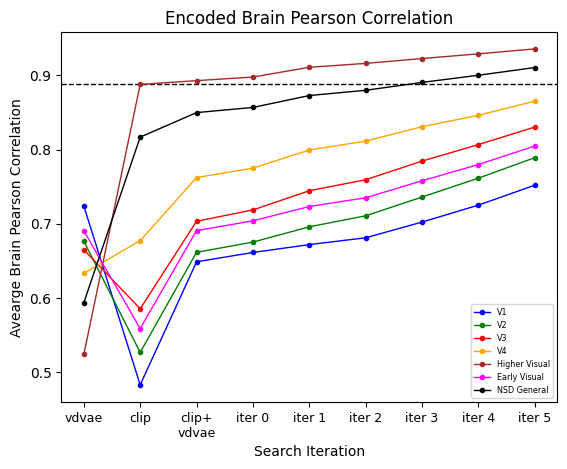

In [4]:
# Average Iteration Brain Region Plot

import matplotlib.pyplot as plt

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]

for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    

# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), color = 'blue', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), color = 'green', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), color = 'red',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), color = 'orange',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), color = 'brown', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(),  color = 'magenta',linestyle = 'dashed', linewidth=1)
plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean(), color = 'black', linestyle = 'dashed', linewidth=1)

plt.plot(brain_correlation_V1, marker='.', color = 'blue', label = 'V1', linewidth=1)
plt.plot(brain_correlation_V2, marker='.', color = 'green',label = 'V2', linewidth=1)
plt.plot(brain_correlation_V3, marker='.', color = 'red',  label = 'V3', linewidth=1)
plt.plot(brain_correlation_V4, marker='.', color = 'orange', label = 'V4', linewidth=1)
plt.plot(brain_correlation_higher_visual, marker='.', color = 'brown', label = 'Higher Visual', linewidth=1)
plt.plot(brain_correlation_early_visual, marker='.',  color = 'magenta', label = 'Early Visual', linewidth=1)
plt.plot(brain_correlation_unmasked, marker='.',  color = 'black', label = 'NSD General', linewidth=1)
plt.xticks(range(len(x)), x,fontsize=9)

plt.legend(fontsize = "xx-small")
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 300


/tmp/ipykernel_66579/818572092.py:178: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[7].set_color('silver')


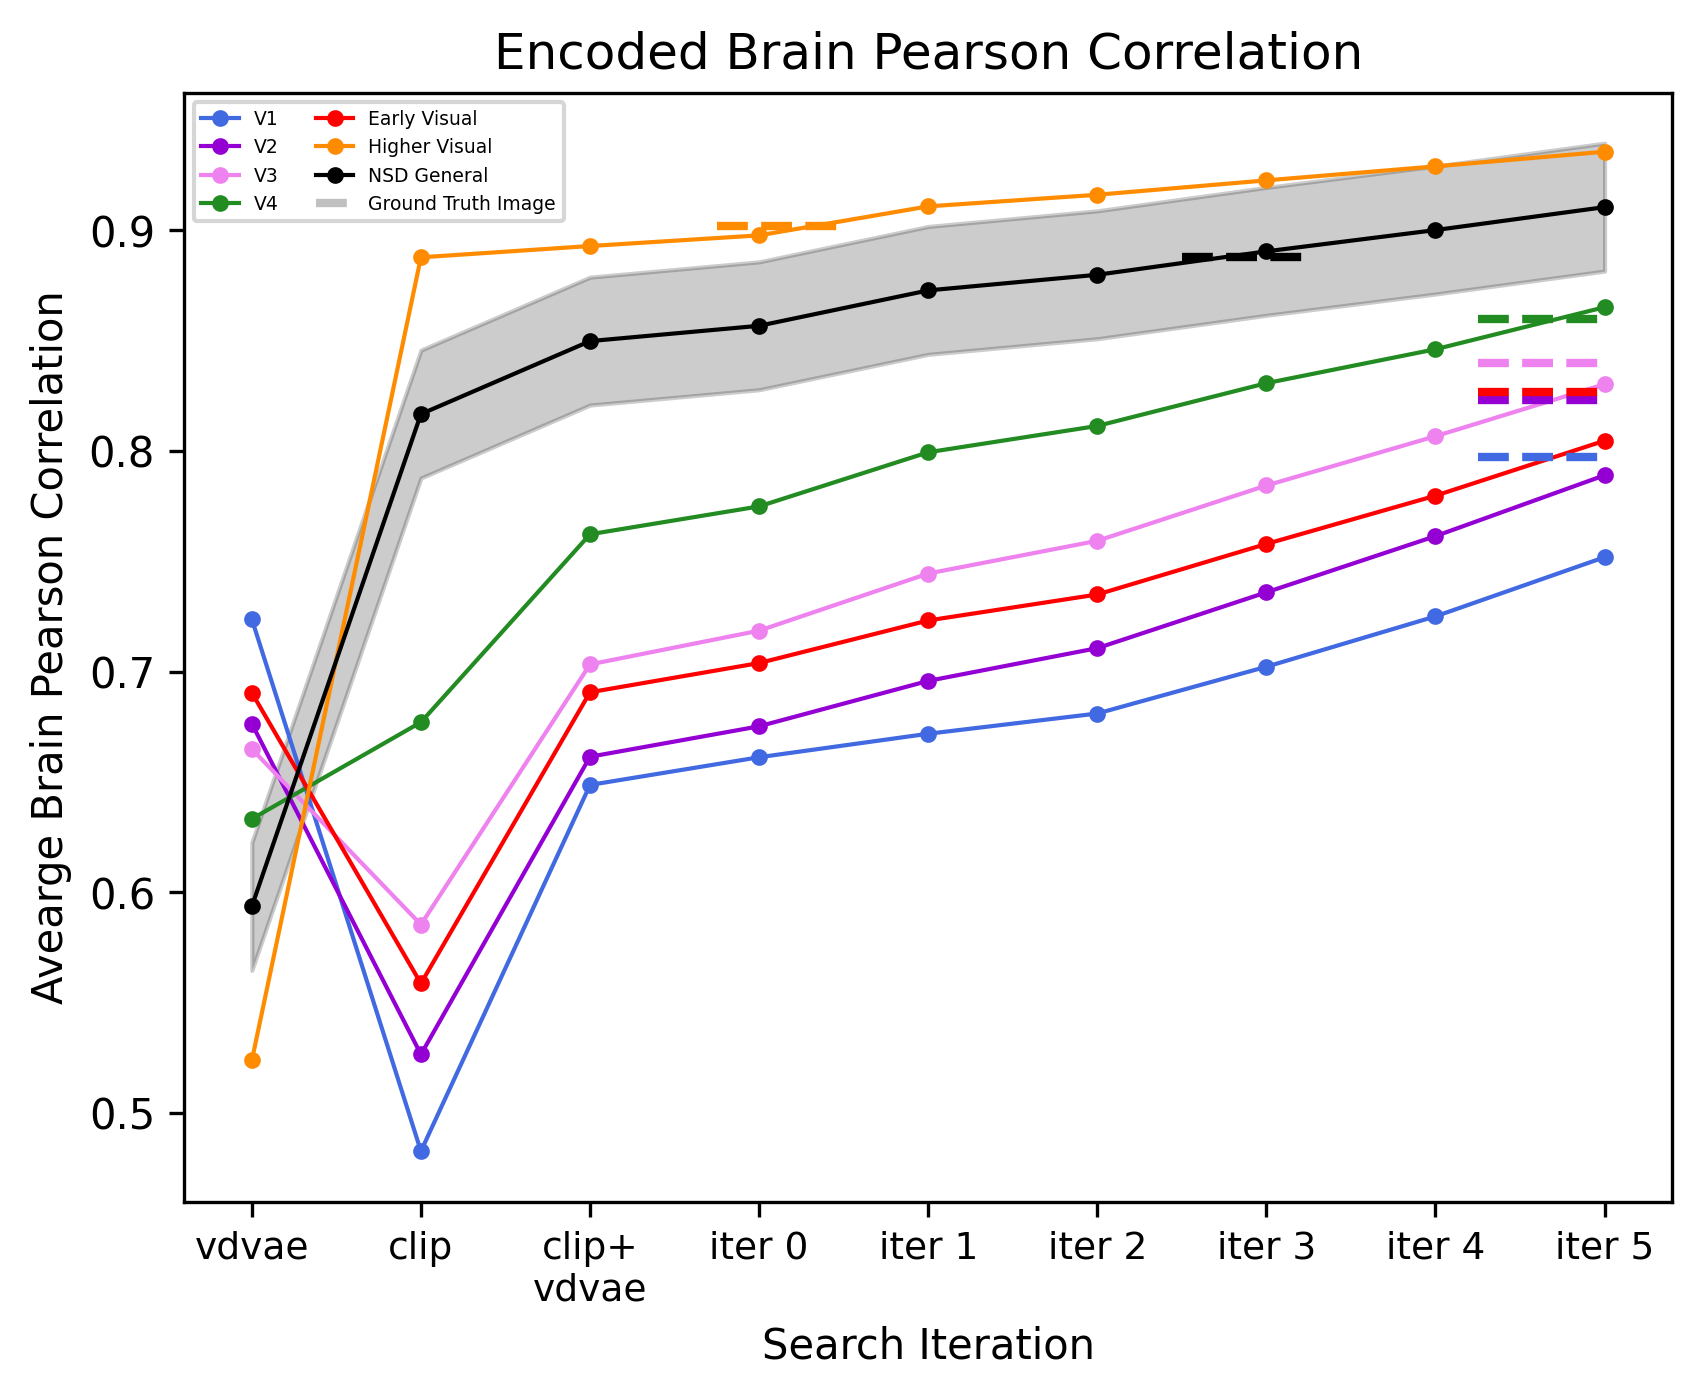

In [5]:
# Average Iteration Brain Region Plot

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

y_v1 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean()
y_v2 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean()
y_v3 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean()
y_v4 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean()
y_ev = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean()
y_hv = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean()
y_unmasked = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean()

v1_set = True
v2_set = True
v3_set = True
v4_set = True
ev_set = True
hv_set = True
unmasked_set = True

x_v1 = 0 
x_v2 = 0 
x_v3 = 0 
x_v4 = 0 
x_ev = 0 
x_hv = 0 
x_umasked = 0 

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
iteration = 0


for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    
    if(iteration_val_v1 > y_v1 and v1_set):
        x_v1 = iteration - 1
        v1_set = False
        
    if(iteration_val_v2 > y_v2 and v2_set):
        x_v2 = iteration - 1
        v2_set = False
        
    if(iteration_val_v3 > y_v3 and v3_set):
        x_v3 = iteration - 1
        v3_set = False
        
    if(iteration_val_v4 > y_v4 and v4_set):
        x_v4 = iteration - 1
        v4_set = False
        
    if(iteration_val_ev > y_ev and ev_set):
        x_ev = iteration - 1
        ev_set = False
        
    if(iteration_val_hv > y_hv and hv_set):
        x_hv = iteration - 1
        hv_set = False
        
    if(iteration_val_unmasked > y_unmasked and unmasked_set):
        x_unmasked = iteration - 1
        unmasked_set = False
        
    iteration += 1
    
# print(df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean())
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')


N = 9
#x = np.array([0,1,2,3,4,5,6,7,8,9])
# y = np.array(brain_correlation_unmasked)
# a, b = np.polyfit(x, brain_correlation_unmasked, deg=1)
# y_est = a * x + b
# y_err = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
# print(y_err[0])
# print(y_err[1])

y_un = np.array(brain_correlation_unmasked)
ci_un = 0.95 * np.std(y_un) / math.sqrt(N)

# y_hi = np.array(brain_correlation_higher_visual)
# ci_hi = 0.95 * np.std(y_hi) / math.sqrt(N)

# y_er = np.array(brain_correlation_early_visual)
# ci_er = 0.95 * np.std(y_er) / math.sqrt(N)

# y_vo = np.array(brain_correlation_V1)
# ci_vo = 0.95 * np.std(y_vo) / math.sqrt(N)

# y_vt = np.array(brain_correlation_V2)
# ci_vt = 0.95 * np.std(y_vt) / math.sqrt(N)

# y_vth = np.array(brain_correlation_V3)
# ci_vth = 0.95 * np.std(y_vth) / math.sqrt(N)

# y_vf = np.array(brain_correlation_V4)
# ci_vf = 0.95 * np.std(y_vf) / math.sqrt(N)

# def mean_confidence_interval(data, confidence=0.95):
#     a = 1.0 * np.array(data)
#     n = len(a)
#     m, se = np.mean(a), scipy.stats.sem(a)
#     h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h

# mean, lower, upper = [],[],[]
# ci = 0.95

# m, ml, mu = mean_confidence_interval(y, ci)
# mean.append(m)
# lower.append(ml)
# upper.append(mu)


plt.plot(brain_correlation_V1, marker='.', label = 'V1', linewidth=1, color = "royalblue")
plt.plot(brain_correlation_V2, marker='.', label = 'V2', linewidth=1, color = "darkviolet")
plt.plot(brain_correlation_V3, marker='.', label = 'V3', linewidth=1, color = "violet")
plt.plot(brain_correlation_V4, marker='.', label = 'V4', linewidth=1, color = "forestgreen")
plt.plot(brain_correlation_early_visual, marker='.', label = 'Early Visual', linewidth=1, color = "red")
plt.plot(brain_correlation_higher_visual, marker='.', label = 'Higher Visual', linewidth=1, color = "darkorange")
plt.plot(brain_correlation_unmasked, marker='.', label = 'NSD General', linewidth=1, color = "black")
plt.xticks(range(len(x)), x,fontsize=9)
# plt.fill_between(x, y_err[0], y_err[0], color='dimgray', alpha=0.2)
# plt.fill_between(x, upper, lower, color='dimgray', alpha=0.2)
plt.fill_between(x, (y_un-ci_un), (y_un+ci_un), color='black', alpha=.2)
# plt.fill_between(x, (y_hi-ci_hi), (y_hi+ci_hi), color='darkorange', alpha=.2)
# plt.fill_between(x, (y_er-ci_er), (y_er+ci_er), color='red', alpha=.2)
# plt.fill_between(x, (y_vo-ci_vo), (y_vo+ci_vo), color='royalblue', alpha=.2)
# plt.fill_between(x, (y_vt-ci_vt), (y_vt+ci_vt), color='darkviolet', alpha=.2)
# plt.fill_between(x, (y_vth-ci_vth), (y_vth+ci_vth), color='violet', alpha=.2)
# plt.fill_between(x, (y_vf-ci_vf), (y_vf+ci_vf), color='forestgreen', alpha=.2)

plt.plot([7.25, 7 + 1], [y_v1, y_v1] , color = "royalblue", linestyle="dashed", linewidth=2)
plt.plot([7.25, 7 + 1], [y_v2, y_v2] , color = "darkviolet", linestyle="dashed", linewidth=2)
plt.plot([7.25, 7 + 1], [y_v3, y_v3] , color = "violet", linestyle="dashed", linewidth=2)
plt.plot([x_v4 + 0.25, x_v4 + 1], [y_v4, y_v4] , color = 'forestgreen', linestyle="dashed", linewidth=2)
plt.plot([7.25, 7 + 1], [y_ev - 0.002, y_ev - 0.002] , color = 'red', linestyle="dashed", linewidth=2)
plt.plot([x_hv - 0.25, x_hv + 0.50], [y_hv, y_hv] , color = "darkorange", linestyle="dashed", linewidth=2)
plt.plot([x_unmasked + 0.5, x_unmasked + 1.25], [y_unmasked, y_unmasked] , color = 'black', linestyle="dashed", linewidth=2, label="Ground Truth Image")
#plt.axhline(x = [1,3], y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
leg = plt.legend(loc="upper left", ncol = 2, fontsize = "4.5")
leg.legendHandles[7].set_color('silver')
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 300


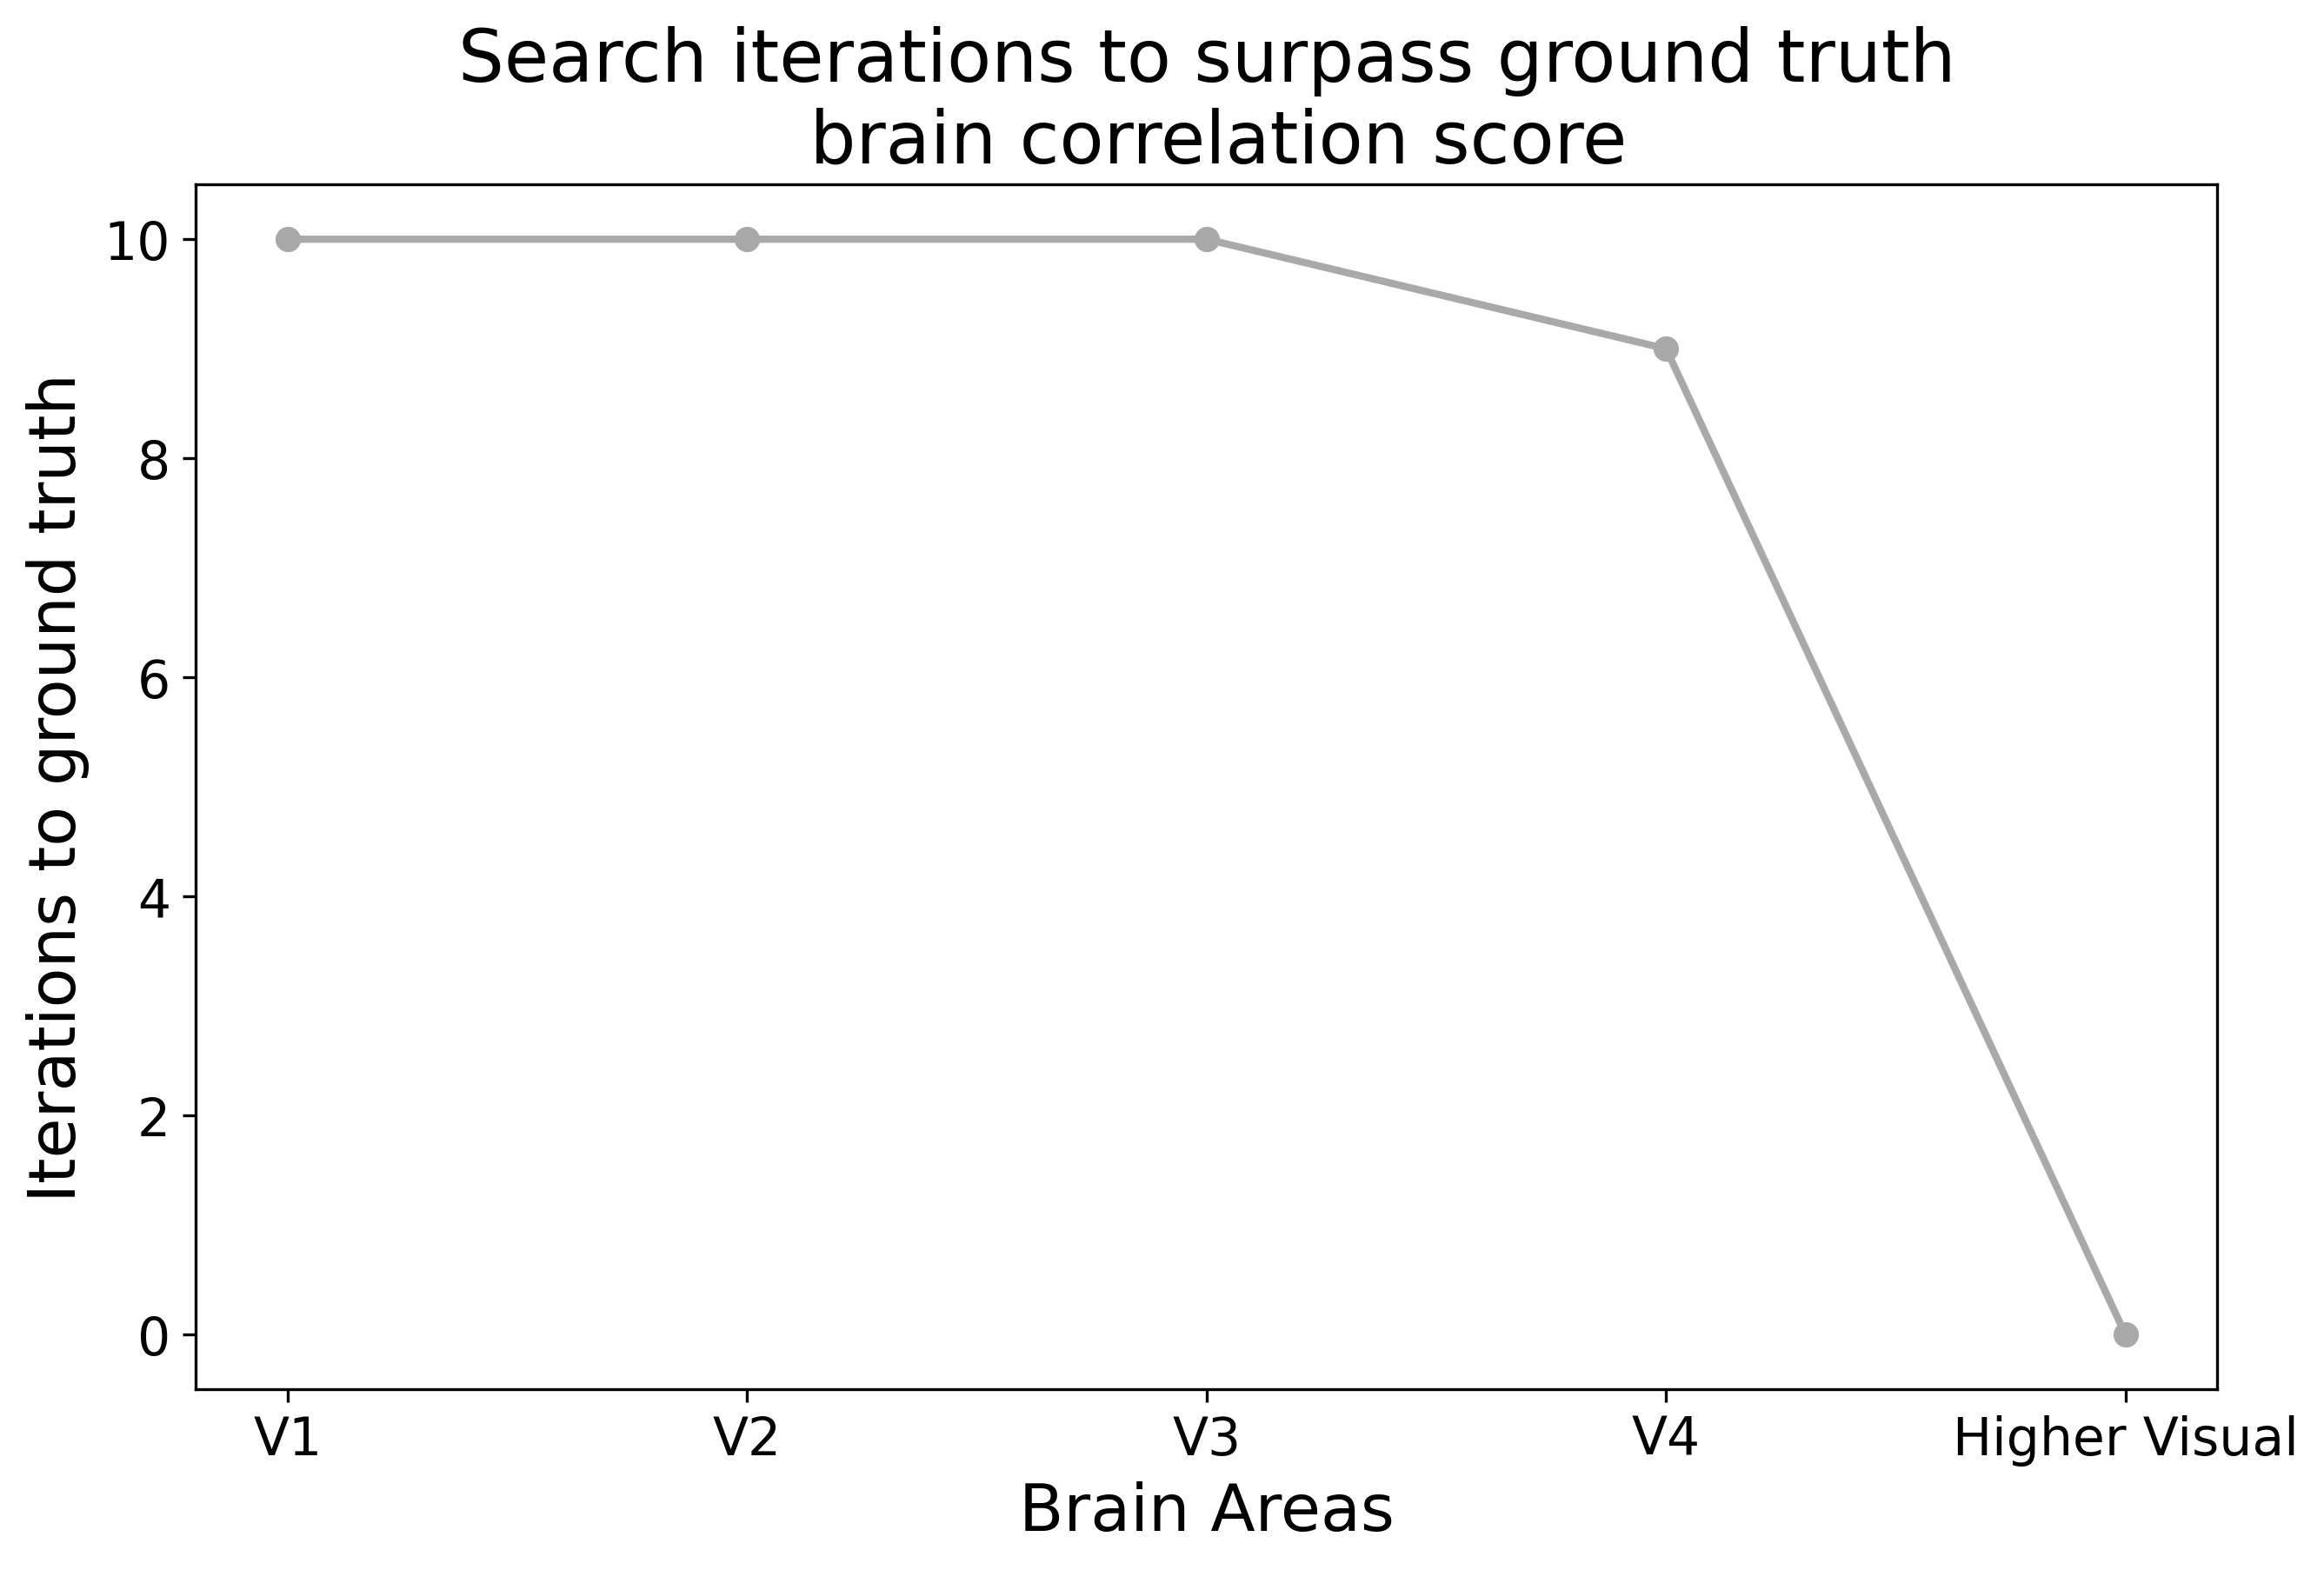

In [31]:
# Search iterations to Ground Truth

x_iter_values = []

x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(9)
x_iter_values.append(0)

x_labels = ['V1', 'V2', 'V3', 'V4', 'Higher Visual']

# x_iter_values.append(0)
# x_iter_values.append(x_v4)
# x_iter_values.append(x_v3)
# x_iter_values.append(x_v2)
# x_iter_values.append(9)

# x_labels = ['Higher Visual', 'V4', 'V3', 'V2', 'V1']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_labels, x_iter_values, marker='o', linewidth=2, color = "darkgray")

plt.xlabel("Brain Areas", fontsize=18)
plt.ylabel("Iterations to ground truth", fontsize=18)
plt.title("Search iterations to surpass ground truth\n brain correlation score", fontsize=20)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Single Iteration Brain Region Plot

sample_0 = []
sample_1 = []
sample_2 = []
sample_3 = []
sample_4 = []
sample_5 = []
sample_6 = []
sample_7 = []
sample_8 = []
sample_9 = []

for iteration in range(10):
    sample_0.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 0)]['Brain Correlation Unmasked'])
    sample_1.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 1)]['Brain Correlation Unmasked'])
    sample_2.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 2)]['Brain Correlation Unmasked'])
    sample_3.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 3)]['Brain Correlation Unmasked'])
    sample_4.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 4)]['Brain Correlation Unmasked'])
    sample_5.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 5)]['Brain Correlation Unmasked'])
    sample_6.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 6)]['Brain Correlation Unmasked'])
    sample_7.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 7)]['Brain Correlation Unmasked'])
    sample_8.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 8)]['Brain Correlation Unmasked'])
    sample_9.append(df.loc[(df['Iter'] == iteration) & (df['ID'] == 9)]['Brain Correlation Unmasked'])


plt.plot(sample_0, label = 'Sample 0')
plt.plot(sample_1, label = 'Sample 1')
plt.plot(sample_2, label = 'Sample 2')
plt.plot(sample_3, label = 'Sample 3')
plt.plot(sample_4, label = 'Sample 4')
plt.plot(sample_5, label = 'Sample 5')
plt.plot(sample_6, label = 'Sample 6')
plt.plot(sample_7, label = 'Sample 7')
plt.plot(sample_8, label = 'Sample 8')
plt.plot(sample_9, label = 'Sample 9')
plt.legend(fontsize = "x-small")
plt.xlabel("Search Iteration")
plt.ylabel("Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation Unmasked")

/export/raid1/home/ojeda040/Second-Sight
0


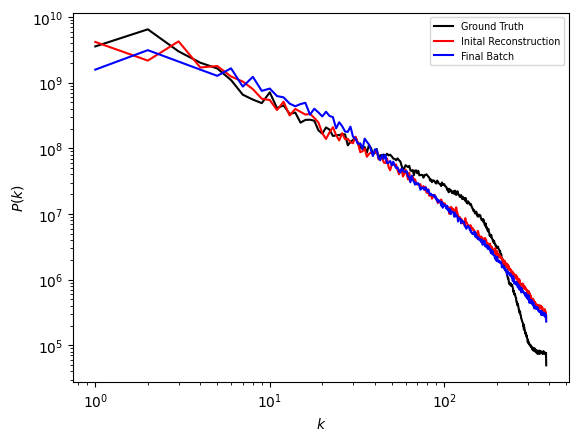

In [12]:
# Fourier Transform of Images
import matplotlib.pyplot as plt
import torch.nn as nn
from skimage import io
print(os.getcwd())

os.chdir("/export/raid1/home/ojeda040/Second-Sight")

subject = 5
folder = "Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter"
image = "Ground Truth"

best_batch = torch.load("/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/0/iter_5/best_batch_index.pt")
print(int(best_batch))

path_clip_distribution   = "/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/0/clip_distribution/"
path_iter_batch          = "/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/0/iter_5/batch_" + str(int(best_batch)) +"/"
path                     = "/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/0/"
path_grayscale           = "/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/" + "0/" + image + "Grayscale.png"

def convert_images_grayscale(path, filename): 
    
    # Set paths
    path_filename   = path + filename
    path_grayscale  = path_filename + " Grayscale.png"
    
    # Convert the image to grayscale
    img_rgb = Image.open(path_filename + ".png")
    img_gray = img_rgb.convert('L')
    img_gray.save(path_grayscale)

def create_power_spectrum(path):

    # Create a numpy array of the image.
    image = mpimg.imread(path)

    npix = image.shape[0]

    # Fourier transform of two dimensional image data array
    fourier_image = np.fft.fftn(image)

    # The Fourier image array now contains the complex valued amplitudes of all the Fourier components. 
    # Only require the square of the amplitudes to compute the variances.
    fourier_amplitudes = np.abs(fourier_image)**2

    # Automatically return a one dimensional array containing the wave vectors for the numpy.fft.fftn call, in the correct order.
    kfreq = np.fft.fftfreq(npix) * npix

    # Convert this to a two dimensional array matching the layout of the two dimensional Fourier image
    kfreq2D = np.meshgrid(kfreq, kfreq)

    # Interested in the actual wave vectors, but rather in their norm
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    # No longer need the wave vector norms or Fourier image to be laid out as a two dimensional array, so we will flatten them
    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    # To bin the amplitudes in k space, we need to set up wave number bins.
    kbins = np.arange(0.5, npix//2+1, 1.)

    # The kbin array will contain the start and end points of all bins; the corresponding  k values are the midpoints of these bins
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    # To compute the average Fourier amplitude (squared) in each bin
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                        statistic = "mean",
                                        bins = kbins)

    # Remember that we want the total variance within each bin. Right now, we only have the average power.
    # To get the total power, we need to multiply with the volume in each bin (in 2D, this volume is actually a surface area)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    
    # kvals = Frequency
    # Abins = Amplitude 
    return kvals, Abins

# -------------------------------------
# Steps:
    # Z-score all the images
    # COnvert the image into a 2D fft
    #


# -------------------------------------


# Ground Truth Line
#convert_images_grayscale(path, "Ground Truth")
kvals_ground_truth, Abins_ground_truth = create_power_spectrum(path + "Ground Truth Grayscale.png")

kvals_clip_distribution = []
Abins_clip_distribution = []
for i in range(10):
    
    #convert_images_grayscale(path_clip_distribution, str(i))
    kval, Abin = create_power_spectrum(path_clip_distribution + str(i) + " Grayscale.png")
    kvals_clip_distribution.append(kval)
    Abins_clip_distribution.append(Abin)
    
kvals_iter_batch = []
Abins_iter_batch = []
for i in range(10):
    
    #convert_images_grayscale(path_iter_batch, str(i))
    kval, Abin = create_power_spectrum(path_iter_batch + str(i) + " Grayscale.png")
    kvals_iter_batch.append(kval)
    Abins_iter_batch.append(Abin)
    

plt.loglog(kvals_ground_truth, Abins_ground_truth, color = "black", label = "Ground Truth")
plt.loglog(kvals_clip_distribution[0], Abins_clip_distribution[0], color = "red", label = "Inital Reconstruction")
# plt.loglog(kvals_clip_distribution[1], Abins_clip_distribution[1])
plt.loglog(kvals_iter_batch[0], Abins_iter_batch[0], color = "blue", label = "Final Batch")
# plt.loglog(kvals_iter_batch[1], Abins_iter_batch[1])
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend(fontsize = "x-small")
plt.show()




In [42]:
['ID', 'Sample Count', 'Batch Number', 'Search Reconstruction', 'Sample Indicator', 'Strength', 'Brain Correlation V1', 'Brain Correlation V2', 
'Brain Correlation V3', 'Brain Correlation V4', 'Brain Correlation Early Visual', 'Brain Correlation Higher Visual', 'Brain Correlation NSD General',
'SSIM', 'Pixel Correlation', 'CLIP Cosine', 'CLIP Two-way', 'AlexNet 2', 'AlexNet 5', 'AlexNet 7', 'Inception V3', 'EffNet-B', 'SwAV']

folders = {2 : "vdvae_distribution", 1 : "clip_distribution", 3 : "clip+vdvae_distribution", 4 : "iter_0", 5 : "iter_1", 6 : "iter_2", 7 : "iter_3", 8 : "iter_4", 9 : "iter_5"}
ID = 730

single_sample = df.loc[(df['ID'] == ID)]
single_sample = single_sample[['ID', 'Sample Count', 'Batch Number', 'Search Reconstruction', 'Sample Indicator', 'Brain Correlation V1', 'Brain Correlation V2', 
'Brain Correlation V3', 'Brain Correlation V4', 'Brain Correlation Early Visual', 'Brain Correlation Higher Visual', 'Brain Correlation NSD General']]

ground_truth_v1     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V1'])
ground_truth_v2     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V2'])
ground_truth_v3     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V3'])
ground_truth_v4     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V4'])
ground_truth_ev     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation Early Visual'])
ground_truth_hv     = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation Higher Visual'])
ground_truth_nsd    = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation NSD General'])

v1_found = False
v2_found = False
v3_found = False
v4_found = False
ev_found = False
hv_found = False
nsd_found = False

single_sample = single_sample[:-1]


print("ID: ", ID)
for index, row in single_sample.iterrows():
    v1 = row['Brain Correlation V1']
    v2 = row['Brain Correlation V2']
    v3 = row['Brain Correlation V3']
    v4 = row['Brain Correlation V4']
    ev = row['Brain Correlation Early Visual']
    hv = row['Brain Correlation Higher Visual']
    nsd = row['Brain Correlation NSD General']
    
    sample = row['Sample Indicator']
    batch = row['Batch Number']
    
    if(v1 > ground_truth_v1 and v1_found == False):
        print("--------V1---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ", folders[sample])
        v1_found = True
        
    if(v2 > ground_truth_v2 and v2_found == False):
        print("--------V2---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ", folders[sample])
        v2_found = True
        
    if(v3 > ground_truth_v3 and v3_found == False):
        print("--------V3---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ",  folders[sample])
        v3_found = True
        
    if(v4 > ground_truth_v4 and v4_found == False):
        print("--------V4---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ",  folders[sample])
        v4_found = True
          
    if(ev > ground_truth_ev and ev_found == False):
        print("--------EV---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ",  folders[sample])
        ev_found = True
        
    if(hv > ground_truth_hv and hv_found == False):
        print("--------HV---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ",  folders[sample])
        hv_found = True
        
    if(nsd > ground_truth_nsd and nsd_found == False):
        print("--------NSD---------")
        print("Batch Nnumber: ", batch)
        print("Sample: ",  folders[sample])
        nsd_found = True
        
    
    
single_sample.head(47)

ID:  730
--------HV---------
Batch Nnumber:  nan
Sample:  clip_distribution
--------V1---------
Batch Nnumber:  nan
Sample:  vdvae_distribution
--------NSD---------
Batch Nnumber:  1.0
Sample:  iter_3


/tmp/ipykernel_128841/2660064201.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v1 = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V1'])
/tmp/ipykernel_128841/2660064201.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v2 = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V2'])
/tmp/ipykernel_128841/2660064201.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v3 = float(single_sample.loc[(df['Sample Indicator'] == 0)]['Brain Correlation V3'])
/tmp/ipykernel_128841/2660064201.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future.

,ID,Sample Count,Batch Number,Search Reconstruction,Sample Indicator,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,Brain Correlation V4,Brain Correlation Early Visual,Brain Correlation Higher Visual,Brain Correlation NSD General
31114,730,0.0,NaN,NaN,1,0.610565,0.612364,0.706003,0.910608,0.654023,0.913608,0.857799
31115,730,1.0,NaN,NaN,1,0.476342,0.558407,0.688507,0.870235,0.622558,0.933449,0.885868
31116,730,2.0,NaN,NaN,1,-0.373144,-0.205977,0.042157,0.473242,-0.080883,0.911076,0.708848
31117,730,3.0,NaN,NaN,1,0.486211,0.540377,0.680968,0.881073,0.603613,0.907645,0.851431
31118,730,4.0,NaN,NaN,1,0.270859,0.298480,0.370783,0.791514,0.387641,0.945289,0.854217
31119,730,0.0,NaN,NaN,2,0.789155,0.765070,0.801951,0.845912,0.795738,0.838573,0.826790
31120,730,1.0,NaN,NaN,2,0.799251,0.801562,0.815685,0.812341,0.796289,0.806956,0.802130
31121,730,2.0,NaN,NaN,2,0.797533,0.773971,0.800956,0.789289,0.775835,0.792290,0.789799
31122,730,3.0,NaN,NaN,2,0.798481,0.780931,0.794528,0.773855,0.771098,0.761158,0.761241
31123,730,4.0,NaN,NaN,2,0.841851,0.833675,0.841504,0.852693,0.833171,0.863602,0.854591


In [3]:
idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 
        109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
        182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 
        221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 
        258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 
        333, 334, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 406, 407, 408, 
        409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 
        483, 484, 485, 486, 487, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 
        558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 
        594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 
        633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 657, 659, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 
        672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 
        710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 
        747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 
        784, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 847, 848, 849, 851, 852, 854, 855, 856, 857, 858, 859,
        861, 862, 863, 864, 865, 866, 867, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 892, 893, 894, 895, 896, 897, 
        898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 
        934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 
        971, 974, 976, 977, 978, 979, 980, 981]

v1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v2 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v3 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v4 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
ev = [0, 0, 0, 0, 0, 0, 0, 0, 0]
hv = [0, 0, 0, 0, 0, 0, 0, 0, 0]
nsd = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#folders = {"vdvae_distribution" : 0, "clip_distribution" : 1, "clip+vdvae_distribution" : 2, "iter_0" : 3, "iter_1" : 4, "iter_2" : 5, "iter_3" : 6, "iter_4" : 7 , "iter_5": 8}
#folders = {"clip_distribution" : 1, "vdvae_distribution" : 2, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
list_indicator = {2 : 0, 1 : 1, 3 : 2, 4 : 3, 5 : 4 , 6 : 5, 7 : 6, 8 : 7, 9 : 8}

ground_truth_samples = df.loc[(df['Sample Indicator'] == 0)]

# Append rows to an empty DataFrame
for i in tqdm(idx, desc="creating bar graph numbers"):
        
    ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
    ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
    ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
    ground_truth_v4     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V4'])
    ground_truth_ev     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Early Visual'])
    ground_truth_hv     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Higher Visual'])
    ground_truth_nsd    = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation NSD General'])
    
    single_sample = df.loc[(df['ID'] == i)]
    single_sample = single_sample[:-2]
    
    for folder, value in folders.items():
    
        v1_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V1'].mean()
        v2_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V2'].mean()
        v3_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V3'].mean()
        v4_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V4'].mean()
        ev_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Early Visual'].mean()
        hv_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Higher Visual'].mean()
        nsd_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation NSD General'].mean()

        if(v1_bc > ground_truth_v1):
            v1[list_indicator[value]] += 1
            
        if(v2_bc > ground_truth_v2):
            v2[list_indicator[value]] += 1
            
        if(v3_bc > ground_truth_v3):
            v3[list_indicator[value]] += 1
            
        if(v4_bc > ground_truth_v4):
            v4[list_indicator[value]] += 1
        
        if(ev_bc > ground_truth_ev):
            ev[list_indicator[value]] += 1
            
        if(hv_bc > ground_truth_hv):
            hv[list_indicator[value]] += 1
            
        if(nsd_bc > ground_truth_nsd):
            nsd[list_indicator[value]] += 1
            
print(v1)
print(v2)
print(v3)
print(v4)
print(ev)
print(hv)
print(nsd)
    



creating bar graph numbers:   0%|          | 0/897 [00:00<?, ?it/s]/tmp/ipykernel_36041/1933675742.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
/tmp/ipykernel_36041/1933675742.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
/tmp/ipykernel_36041/1933675742.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
/tmp/ipykernel_36041/1933675742.py:49: Fut

[229, 24, 75, 84, 95, 106, 137, 186, 247]
[121, 25, 67, 80, 87, 109, 147, 189, 278]
[80, 32, 83, 97, 126, 151, 194, 256, 357]
[47, 83, 138, 162, 214, 248, 297, 359, 451]
[79, 25, 70, 83, 98, 113, 157, 212, 288]
[21, 268, 305, 319, 404, 441, 499, 546, 611]
[15, 113, 166, 184, 265, 302, 382, 452, 527]


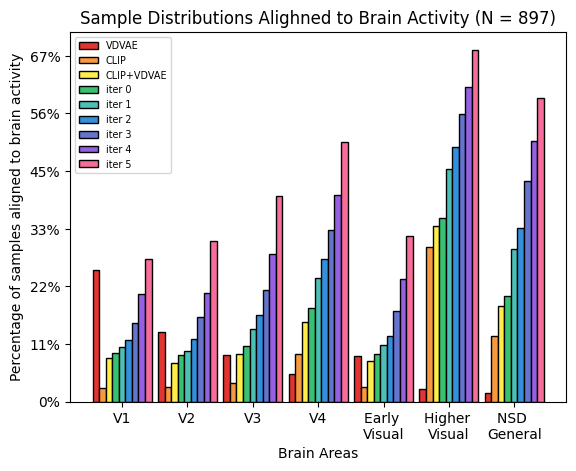

In [12]:
# Create Bar Plots

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
x = ["V1", "V2", "V3", "V4", "Early \nVisual", "Higher \nVisual", "NSD \nGeneral"]

vdvae       = [v1[0], v2[0], v3[0], v4[0], ev[0], hv[0], nsd[0]]
clip        = [v1[1], v2[1], v3[1], v4[1], ev[1], hv[1], nsd[1]]
clip_vdvae  = [v1[2], v2[2], v3[2], v4[2], ev[2], hv[2], nsd[2]]
iter_0      = [v1[3], v2[3], v3[3], v4[3], ev[3], hv[3], nsd[3]]
iter_1      = [v1[4], v2[4], v3[4], v4[4], ev[4], hv[4], nsd[4]]
iter_2      = [v1[5], v2[5], v3[5], v4[5], ev[5], hv[5], nsd[5]]
iter_3      = [v1[6], v2[6], v3[6], v4[6], ev[6], hv[6], nsd[6]]
iter_4      = [v1[7], v2[7], v3[7], v4[7], ev[7], hv[7], nsd[7]]
iter_5      = [v1[8], v2[8], v3[8], v4[8], ev[8], hv[8], nsd[8]]

x_axis = np.arange(len(x))

n = 7
r = np.arange(n)
width = 0.10


plt.bar(r - width * 4, vdvae, color = '#e3342f',
        width = width, edgecolor = 'black',
        label='VDVAE')
plt.bar(r - width * 3, clip, color = '#f6993f',
        width = width, edgecolor = 'black',
        label='CLIP')
plt.bar(r - width * 2, clip_vdvae, color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='CLIP+VDVAE')
plt.bar(r - width, iter_0, color = '#38c172',
        width = width, edgecolor = 'black',
        label='iter 0')
plt.bar(r, iter_1, color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='iter 1')
plt.bar(r + width, iter_2, color = '#3490dc',
        width = width, edgecolor = 'black',
        label='iter 2')
plt.bar(r + width * 2, iter_3, color = '#6574cd',
        width = width, edgecolor = 'black',
        label='iter 3')
plt.bar(r + width * 3, iter_4, color = '#9561e2',
        width = width, edgecolor = 'black',
        label='iter 4')
plt.bar(r + width * 4, iter_5, color = '#f66d9b',
        width = width, edgecolor = 'black',
        label='iter 5')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Percentage of samples aligned to brain activity")
plt.title("Sample Distributions Alighned to Brain Activity (N = 897)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(897))
#plt.xlim(897)
plt.legend(fontsize = "x-small")
plt.show()





In [31]:
idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 
        109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
        182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 
        221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 
        258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 
        333, 334, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 406, 407, 408, 
        409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 
        483, 484, 485, 486, 487, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 
        558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 
        594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 
        633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 657, 659, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 
        672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 
        710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 
        747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 
        784, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 847, 848, 849, 851, 852, 854, 855, 856, 857, 858, 859,
        861, 862, 863, 864, 865, 866, 867, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 892, 893, 894, 895, 896, 897, 
        898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 
        934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 
        971, 974, 976, 977, 978, 979, 980, 981]

# idx = [20, 26, 37, 46, 58, 63, 65, 69]

v1_iter   = [0, 0, 0, 0, 0, 0]
v2_iter   = [0, 0, 0, 0, 0, 0]
v3_iter   = [0, 0, 0, 0, 0, 0]
v4_iter   = [0, 0, 0, 0, 0, 0]
ev_iter   = [0, 0, 0, 0, 0, 0]
hv_iter   = [0, 0, 0, 0, 0, 0]
nsd_iter  = [0, 0, 0, 0, 0, 0]

v1  = [0, 0, 0]
v2  = [0, 0, 0]
v3  = [0, 0, 0]
v4  = [0, 0, 0]
ev  = [0, 0, 0]
hv  = [0, 0, 0]
nsd = [0, 0, 0]

#folders = {"vdvae_distribution" : 0, "clip_distribution" : 1, "clip+vdvae_distribution" : 2, "iter_0" : 3, "iter_1" : 4, "iter_2" : 5, "iter_3" : 6, "iter_4" : 7 , "iter_5": 8}
#folders = {"clip_distribution" : 1, "vdvae_distribution" : 2, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
folders = {"iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9, "vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3}
list_indicator = {4 : 0, 5 : 1 , 6 : 2, 7 : 3, 8 : 4, 9 : 5}
iteration = {2: 0, 1:1, 3:2}

ground_truth_samples = df.loc[(df['Sample Indicator'] == 0)]

# Append rows to an empty DataFrame
for i in tqdm(idx, desc="creating continous graph numbers"):
        
    ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
    ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
    ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
    ground_truth_v4     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V4'])
    ground_truth_ev     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Early Visual'])
    ground_truth_hv     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Higher Visual'])
    ground_truth_nsd    = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation NSD General'])
    
    single_sample = df.loc[(df['ID'] == i)]
    single_sample = single_sample[:-2]
    
    converge = False
    
    v1_found = False
    v2_found = False
    v3_found = False
    v4_found = False
    ev_found = False
    hv_found = False
    nsd_found = False
    
    v1_index = 10
    v2_index = 10
    v3_index = 10
    v4_index = 10
    ev_index = 10
    hv_index = 10
    nsd_index = 10
    
    print("------------------ New Sample --------------------------")
    
    for folder, value in folders.items():
    
        v1_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V1'].mean()
        v2_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V2'].mean()
        v3_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V3'].mean()
        v4_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V4'].mean()
        ev_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Early Visual'].mean()
        hv_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Higher Visual'].mean()
        nsd_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation NSD General'].mean()
            
        if(converge and (v1_bc > ground_truth_v1) and (value == 1 or value == 2 or value == 3)):
            v1[iteration[value]] += 1
            
        if(converge and (v2_bc > ground_truth_v2) and (value == 1 or value == 2 or value == 3)):
            v2[iteration[value]] += 1
            
        if(converge and (v3_bc > ground_truth_v3) and (value == 1 or value == 2 or value == 3)):
            v3[iteration[value]] += 1
            
        if(converge and (v4_bc > ground_truth_v4) and (value == 1 or value == 2 or value == 3)):
            v4[iteration[value]] += 1
            
        if(converge and (ev_bc > ground_truth_ev) and (value == 1 or value == 2 or value == 3)):
            ev[iteration[value]] += 1
            
        if(converge and (hv_bc > ground_truth_hv) and (value == 1 or value == 2 or value == 3)):
            hv[iteration[value]] += 1
            
        if(converge and (nsd_bc > ground_truth_nsd) and (value == 1 or value == 2 or value == 3)):
            nsd[iteration[value]] += 1
        
        if((v1_bc > ground_truth_v1) and (v1_found == False) and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            v1_found = True
            v1_index = list_indicator[value]
            print("v1_bc: ",  v1_bc)
            print("ground_truth_v1: ",  ground_truth_v1)
            print("v1_index: ",  v1_index)
            
            
        if(v2_bc > ground_truth_v2 and v2_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            v2_found = True
            v2_index = list_indicator[value]
            print("v2_bc: ",  v2_bc)
            print("ground_truth_v2: ",  ground_truth_v2)
            print("v2_index: ",  v2_index)
            
        if(v3_bc > ground_truth_v3 and v3_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            v3_found = True
            v3_index = list_indicator[value]
            print("v3_bc: ",  v3_bc)
            print("ground_truth_v3: ",  ground_truth_v3)
            print("v3_index: ",  v3_index)
            
        if(v4_bc > ground_truth_v4 and v4_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            v4_found = True
            v4_index = list_indicator[value]
            print("v4_bc: ",  v4_bc)
            print("ground_truth_v4: ",  ground_truth_v4)
            print("v4_index: ",  v4_index)
        
        if(ev_bc > ground_truth_ev and ev_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            ev_found = True
            ev_index = list_indicator[value]
            print("ev_bc: ",  ev_bc)
            print("ground_truth_ev: ",  ground_truth_ev)
            print("ev_index: ",  ev_index)
            
        if(hv_bc > ground_truth_hv and hv_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            hv_found = True
            hv_index = list_indicator[value]
            print("hv_bc: ",  hv_bc)
            print("ground_truth_hv: ",  ground_truth_hv)
            print("hv_index: ",  hv_index)
            
        if(nsd_bc > ground_truth_nsd and nsd_found == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            nsd_found = True
            nsd_index = list_indicator[value]
            print("nsd_bc: ",  nsd_bc)
            print("ground_truth_nsd: ",  ground_truth_nsd)
            print("nsd_index: ",  nsd_index)
            
        if(v1_bc > ground_truth_v1 and v2_bc > ground_truth_v2
           and v3_bc > ground_truth_v3 and v4_bc > ground_truth_v4
           and ev_bc > ground_truth_ev and hv_bc > ground_truth_hv
           and nsd_bc > ground_truth_nsd and converge == False and (value == 4 or value == 5 or value == 6 or value == 7 or value == 8 or value == 9)):
            converge = True
            v1_iter[v1_index] += 1
            v2_iter[v2_index] += 1
            v3_iter[v3_index] += 1
            v4_iter[v4_index] += 1
            ev_iter[ev_index] += 1 
            hv_iter[hv_index] += 1
            nsd_iter[nsd_index] += 1
            print("----Once----")
            
            
# print(v1_iter)
# print(v2_iter)
# print(v3_iter)
# print(v4_iter)
# print(ev_iter)
# print(hv_iter)
# print(nsd_iter)                  
                     
# print(v1)
# print(v2)
# print(v3)
# print(v4)
# print(ev)
# print(hv)
# print(nsd)


creating continous graph numbers:   0%|          | 0/897 [00:00<?, ?it/s]/tmp/ipykernel_36041/2370605368.py:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
/tmp/ipykernel_36041/2370605368.py:58: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
/tmp/ipykernel_36041/2370605368.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
/tmp/ipykernel_36041/2370605368.py:6

------------------ New Sample --------------------------
v2_bc:  0.6918627430045454
ground_truth_v2:  0.6746748686
v2_index:  0
v1_bc:  0.6421968666045453
ground_truth_v1:  0.6112409234
v1_index:  1
v3_bc:  0.7615075436454546
ground_truth_v3:  0.7230927944
v3_index:  1
ev_bc:  0.7397743192590909
ground_truth_ev:  0.7024748325
ev_index:  1
v4_bc:  0.852419596915
ground_truth_v4:  0.8109712005
v4_index:  3
hv_bc:  0.9503928810349999
ground_truth_hv:  0.9466602802
hv_index:  3
nsd_bc:  0.9203629046799999
ground_truth_nsd:  0.9117001891
nsd_index:  3
----Once----
------------------ New Sample --------------------------
v4_bc:  0.8827911832090908
ground_truth_v4:  0.8494073749
v4_index:  0
v3_bc:  0.7739939987590909
ground_truth_v3:  0.7682254314
v3_index:  2
nsd_bc:  0.9606007019666666
ground_truth_nsd:  0.9576947093
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9627311309133333
ground_truth_hv:  0.9590292573
hv_index:  5
------------------ New Sample ---

creating continous graph numbers:   2%|▏         | 17/897 [00:00<00:17, 51.14it/s]

------------------ New Sample --------------------------
v4_bc:  0.8701772879499999
ground_truth_v4:  0.6983242631
v4_index:  0
hv_bc:  0.9461293816454546
ground_truth_hv:  0.9120354056
hv_index:  0
nsd_bc:  0.9027816300999999
ground_truth_nsd:  0.8714094758
nsd_index:  0
------------------ New Sample --------------------------
hv_bc:  0.9513616290863637
ground_truth_hv:  0.6941096187
hv_index:  0
nsd_bc:  0.9084299992409091
ground_truth_nsd:  0.7072610259
nsd_index:  0
v4_bc:  0.7999761932499999
ground_truth_v4:  0.7751227617
v4_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9441372692550001
ground_truth_hv:  0.9406719208
hv_index:  3
nsd_bc:  0.90776598056
ground_truth_nsd:  0.9015002847
nsd_index:  5
------------------ New Sample --------------------------
nsd_bc:  0.8970502208636362
ground_truth_nsd:  0.8927302361
nsd_index:  1
v4_bc:  0.8331036329349999
ground_truth_v4:  0.8325408101
v4_index:  3
hv_bc:  0.9632066309499999
ground_truth_hv:  0.96240216

creating continous graph numbers:   3%|▎         | 28/897 [00:00<00:17, 48.39it/s]

------------------ New Sample --------------------------
hv_bc:  0.6691782759
ground_truth_hv:  0.5138390064
hv_index:  0
nsd_bc:  0.7171963810900001
ground_truth_nsd:  0.6961404085
nsd_index:  3
v1_bc:  0.7848466734166667
ground_truth_v1:  0.7557717562
v1_index:  4
v3_bc:  0.7476324372777778
ground_truth_v3:  0.7201014161
v3_index:  4
v2_bc:  0.8359241962466666
ground_truth_v2:  0.7965610027
v2_index:  5
ev_bc:  0.8265954415000001
ground_truth_ev:  0.7759529352
ev_index:  5
------------------ New Sample --------------------------
v3_bc:  0.9244713322636364
ground_truth_v3:  0.9174180031
v3_index:  0
v4_bc:  0.9185360778499999
ground_truth_v4:  0.9120605588
v4_index:  0
hv_bc:  0.9470515169863636
ground_truth_hv:  0.9435796738
hv_index:  2
nsd_bc:  0.9358154914545455
ground_truth_nsd:  0.9331843853
nsd_index:  2
v2_bc:  0.9329690535800002
ground_truth_v2:  0.9249325395
v2_index:  5
ev_bc:  0.9265234351266668
ground_truth_ev:  0.9241552949
ev_index:  5
------------------ New Sample ----

creating continous graph numbers:   4%|▍         | 40/897 [00:00<00:16, 51.10it/s]

------------------ New Sample --------------------------
v3_bc:  0.8766766786533334
ground_truth_v3:  0.8725455403
v3_index:  5
v4_bc:  0.8434285203599999
ground_truth_v4:  0.8349556327
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9116112142699999
ground_truth_hv:  0.9113692641
hv_index:  3
v4_bc:  0.8757300774222222
ground_truth_v4:  0.8647921681
v4_index:  4
v2_bc:  0.8523260513866667
ground_truth_v2:  0.8351656795
v2_index:  5
v3_bc:  0.84724099238
ground_truth_v3:  0.8388419151
v3_index:  5
nsd_bc:  0.9070794939933333
ground_truth_nsd:  0.893479228
nsd_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8473171022727272
ground_truth_v4:  0.8068044186
v4_index:  0
hv_bc:  0.9375463399136365
ground_truth_hv:  0.9173055887
hv_index:  0
nsd_bc:  0.9091444801136361
ground_truth_nsd:  0.9050158858
nsd_index:  1
v3_bc:  0.8898376623933333
ground_truth_v3:  0.8857381344
v3_index:  5
------------------ New Sample ------------------

creating continous graph numbers:   6%|▌         | 52/897 [00:01<00:16, 49.88it/s]

------------------ New Sample --------------------------
v1_bc:  0.7979813326545456
ground_truth_v1:  0.7437365055
v1_index:  0
v2_bc:  0.8047004992363637
ground_truth_v2:  0.7526720762
v2_index:  0
v3_bc:  0.7925311083
ground_truth_v3:  0.76140064
v3_index:  0
v4_bc:  0.8077701601045455
ground_truth_v4:  0.7040271163
v4_index:  0
ev_bc:  0.7899764451227274
ground_truth_ev:  0.7424896359
ev_index:  0
hv_bc:  0.8710579140636363
ground_truth_hv:  0.8653798699
hv_index:  0
nsd_bc:  0.8375994102454546
ground_truth_nsd:  0.7915500402
nsd_index:  0
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9045570248909091
ground_truth_hv:  0.8600215316
hv_index:  0
nsd_bc:  0.8787820420590908
ground_truth_nsd:  0.8676896691
nsd_index:  0
v3_bc:  0.9185877508555554
ground_truth_v3:  0.9166238904
v3_index:  4
v4_bc:  0.9468252427
ground_truth_v4:  0.94330585
v4_index:  4
------------------ New Sample --------------------------
v4_bc:  0.8578391237636365
ground_truth_v4:  

creating continous graph numbers:   7%|▋         | 64/897 [00:01<00:15, 52.39it/s]

------------------ New Sample --------------------------
hv_bc:  0.9249771996
ground_truth_hv:  0.9123858213
hv_index:  0
nsd_bc:  0.8594363494318183
ground_truth_nsd:  0.8581860662
nsd_index:  2
v4_bc:  0.829134240745
ground_truth_v4:  0.8009530306
v4_index:  3
------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.6885472834099999
ground_truth_v1:  0.6723796129
v1_index:  3
hv_bc:  0.9685035854649999
ground_truth_hv:  0.9667627811
hv_index:  3
nsd_bc:  0.94001617432
ground_truth_nsd:  0.9322887659
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8515430927266667
ground_truth_hv:  0.8347898722
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9759279340500001
ground_truth_hv:  0.9690144062
hv_index:  3
------------------ New Sample --------------------------
hv_bc:  0.93537527919
ground_truth_hv:  0.

creating continous graph numbers:   8%|▊         | 76/897 [00:01<00:15, 53.79it/s]

------------------ New Sample --------------------------
v4_bc:  0.8565283781888888
ground_truth_v4:  0.8523663282
v4_index:  4
------------------ New Sample --------------------------
v1_bc:  0.5258332247045455
ground_truth_v1:  0.4447878897
v1_index:  0
v2_bc:  0.5707165490454545
ground_truth_v2:  0.5292368531
v2_index:  0
ev_bc:  0.6789949563409091
ground_truth_ev:  0.6494107842
ev_index:  1
v3_bc:  0.7665619909749999
ground_truth_v3:  0.7472327948
v3_index:  3
nsd_bc:  0.9126204460749999
ground_truth_nsd:  0.9066756964
nsd_index:  3
v4_bc:  0.8581072012666666
ground_truth_v4:  0.8322498798
v4_index:  5
------------------ New Sample --------------------------
nsd_bc:  0.8454564024045456
ground_truth_nsd:  0.8316653371
nsd_index:  2
------------------ New Sample --------------------------
v2_bc:  0.8186047474533332
ground_truth_v2:  0.797201097
v2_index:  5
v4_bc:  0.9250678857133331
ground_truth_v4:  0.9250187278
v4_index:  5
hv_bc:  0.9792702992933333
ground_truth_hv:  0.9792140126

creating continous graph numbers:  10%|▉         | 88/897 [00:01<00:14, 54.63it/s]

------------------ New Sample --------------------------
hv_bc:  0.8413858711727275
ground_truth_hv:  0.8237891197
hv_index:  0
nsd_bc:  0.8230218059500001
ground_truth_nsd:  0.8122806549
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9753189926681819
ground_truth_hv:  0.9694198966
hv_index:  0
nsd_bc:  0.947202214605
ground_truth_nsd:  0.93958354
nsd_index:  3
v2_bc:  0.7098400036533333
ground_truth_v2:  0.7079265714
v2_index:  5
v3_bc:  0.8058711369666668
ground_truth_v3:  0.7897276282
v3_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9860191643363637
ground_truth_hv:  0.985797286
hv_index:  1
nsd_bc:  0.9837907453277778
ground_truth_nsd:  0.9834270477
nsd_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v2_bc:  0.4732679521454546
ground_truth_v2:  0.365894407
v2_index:  0
v3_bc:  0.52545143

creating continous graph numbers:  11%|█         | 100/897 [00:01<00:14, 55.01it/s]

------------------ New Sample --------------------------
hv_bc:  0.9832872390666668
ground_truth_hv:  0.9824004769
hv_index:  5
------------------ New Sample --------------------------
v1_bc:  0.7696817490181818
ground_truth_v1:  0.7390401363
v1_index:  0
v3_bc:  0.8441996276409092
ground_truth_v3:  0.8254155517
v3_index:  0
v4_bc:  0.9428311505090909
ground_truth_v4:  0.8828337789
v4_index:  0
ev_bc:  0.845336155459091
ground_truth_ev:  0.8190928698
ev_index:  0
hv_bc:  0.9790551797909092
ground_truth_hv:  0.9229453206
hv_index:  0
nsd_bc:  0.9703179841636363
ground_truth_nsd:  0.9205619693
nsd_index:  0
v2_bc:  0.8424457775166667
ground_truth_v2:  0.8191625476
v2_index:  4
----Once----
------------------ New Sample --------------------------
hv_bc:  0.98134675027
ground_truth_hv:  0.9801028967
hv_index:  3
------------------ New Sample --------------------------
v4_bc:  0.8658901100772728
ground_truth_v4:  0.8392285705
v4_index:  2
hv_bc:  0.9763208844500003
ground_truth_hv:  0.97613

creating continous graph numbers:  12%|█▏        | 112/897 [00:02<00:14, 55.09it/s]

------------------ New Sample --------------------------
v4_bc:  0.8452509479090909
ground_truth_v4:  0.7512252927
v4_index:  0
hv_bc:  0.9440638314590909
ground_truth_hv:  0.9184164405
hv_index:  0
nsd_bc:  0.9082173840590909
ground_truth_nsd:  0.8941987753
nsd_index:  0
v3_bc:  0.9113921089545456
ground_truth_v3:  0.8959317803
v3_index:  2
ev_bc:  0.8697705241863637
ground_truth_ev:  0.8692941666
ev_index:  2
v1_bc:  0.857392096515
ground_truth_v1:  0.8571734428
v1_index:  3
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9479960997888889
ground_truth_hv:  0.9472309351
hv_index:  4
------------------ New Sample --------------------------
v4_bc:  0.9295322136454545
ground_truth_v4:  0.8832861185
v4_index:  0
hv_bc:  0.9787369099545454
ground_truth_hv:  0.9545477033
hv_index:  0
nsd_bc:  0.9609678225090911
ground_truth_nsd:  0.9396983981
nsd_index:  0
v3_bc:  0.843586125965
ground_truth_v3:  0.8173996806
v3_ind

creating continous graph numbers:  14%|█▍        | 124/897 [00:02<00:14, 52.43it/s]

------------------ New Sample --------------------------
hv_bc:  0.9676425700727275
ground_truth_hv:  0.9199581146
hv_index:  0
nsd_bc:  0.9331412667590908
ground_truth_nsd:  0.9180574417
nsd_index:  0
v4_bc:  0.9195782623409093
ground_truth_v4:  0.9119740725
v4_index:  1
v3_bc:  0.9017127653
ground_truth_v3:  0.8906769753
v3_index:  4
v1_bc:  0.84749081134
ground_truth_v1:  0.8156266212
v1_index:  5
v2_bc:  0.9005509098333332
ground_truth_v2:  0.8780866861
v2_index:  5
ev_bc:  0.91486575208
ground_truth_ev:  0.8855586648
ev_index:  5
----Once----
------------------ New Sample --------------------------
v2_bc:  0.9415094256318182
ground_truth_v2:  0.9253736138
v2_index:  0
v3_bc:  0.947140604259091
ground_truth_v3:  0.9120919108
v3_index:  0
v4_bc:  0.9585175161954544
ground_truth_v4:  0.9423100948
v4_index:  0
ev_bc:  0.9410176981545455
ground_truth_ev:  0.9271648526
ev_index:  0
v1_bc:  0.9314216294181817
ground_truth_v1:  0.9295294881
v1_index:  1
nsd_bc:  0.9476153188222223
ground_

creating continous graph numbers:  15%|█▌        | 136/897 [00:02<00:15, 50.37it/s]

------------------ New Sample --------------------------
v4_bc:  0.9281383322277778
ground_truth_v4:  0.9255621433
v4_index:  4
------------------ New Sample --------------------------
v1_bc:  0.7592924101863635
ground_truth_v1:  0.7122018933
v1_index:  0
v2_bc:  0.7953256720909092
ground_truth_v2:  0.7885719538
v2_index:  0
v4_bc:  0.8866365172727272
ground_truth_v4:  0.8562932611
v4_index:  0
ev_bc:  0.8021956844681818
ground_truth_ev:  0.793409884
ev_index:  0
------------------ New Sample --------------------------
v2_bc:  0.8607712745799999
ground_truth_v2:  0.8515372276
v2_index:  5
v3_bc:  0.9231383959466668
ground_truth_v3:  0.9195878506
v3_index:  5
v4_bc:  0.9020866354333333
ground_truth_v4:  0.8991225958
v4_index:  5
------------------ New Sample --------------------------
v3_bc:  0.7178453274772728
ground_truth_v3:  0.7142172456
v3_index:  2
v4_bc:  0.8336239484136364
ground_truth_v4:  0.8154629469
v4_index:  2
v2_bc:  0.6615386207777777
ground_truth_v2:  0.6408549547
v2_in

creating continous graph numbers:  16%|█▌        | 142/897 [00:02<00:15, 47.77it/s]

------------------ New Sample --------------------------
hv_bc:  0.7729183164454546
ground_truth_hv:  0.6213642359
hv_index:  0
nsd_bc:  0.7318269640249999
ground_truth_nsd:  0.7200959325
nsd_index:  3
v4_bc:  0.8427847656999999
ground_truth_v4:  0.8205644488
v4_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.7647380001055556
ground_truth_v1:  0.7199849486
v1_index:  4
v3_bc:  0.8758807811555556
ground_truth_v3:  0.8734701276
v3_index:  4
v2_bc:  0.8192435662133335
ground_truth_v2:  0.8109151721
v2_index:  5
------------------ New Sample --------------------------
v2_bc:  0.5864031531545455
ground_truth_v2:  0.5820230842
v2_index:  0
v4_bc:  0.7807792425227273
ground_truth_v4:  0.5940283537
v4_index:  0
ev_bc:  0.6095848517
ground_truth_ev:  0.6050073504
ev_index:  0
hv_bc:  0.8731291619181817
ground_truth_hv:  0.7064398527
hv_index:  0
nsd_bc:  0.8100425140454547
ground_truth_nsd:  0.6350260377
nsd_i

creating continous graph numbers:  17%|█▋        | 152/897 [00:03<00:19, 39.06it/s]

------------------ New Sample --------------------------
v3_bc:  0.8060995475818182
ground_truth_v3:  0.7819443941
v3_index:  1
v4_bc:  0.8905612284409091
ground_truth_v4:  0.8440639377
v4_index:  1
nsd_bc:  0.8874110660772726
ground_truth_nsd:  0.8624765873
nsd_index:  1
v2_bc:  0.7619637807266667
ground_truth_v2:  0.7614479661
v2_index:  5
ev_bc:  0.7768356760399999
ground_truth_ev:  0.7660380006
ev_index:  5
hv_bc:  0.9296523769733332
ground_truth_hv:  0.9279821515
hv_index:  5
------------------ New Sample --------------------------
v4_bc:  0.9320157793363638
ground_truth_v4:  0.9161938429
v4_index:  0
hv_bc:  0.9436900236409091
ground_truth_hv:  0.9422000051
hv_index:  1
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v4_bc:  0.9348350167272726
ground_truth_v4:  0.9173472524
v4_index:  0
hv_bc:  0.9706782042999998
ground_truth_hv:  0.9694663882
hv_index:  3
nsd_bc:  0.9509803980600001
ground_truth_nsd:  0.9504683614

creating continous graph numbers:  18%|█▊        | 164/897 [00:03<00:16, 45.68it/s]

------------------ New Sample --------------------------
hv_bc:  0.8393925591045455
ground_truth_hv:  0.8073113561
hv_index:  0
nsd_bc:  0.8142127882363638
ground_truth_nsd:  0.8128759265
nsd_index:  1
v1_bc:  0.8044955134333334
ground_truth_v1:  0.7942391634
v1_index:  4
v3_bc:  0.8919323364933333
ground_truth_v3:  0.8550493121
v3_index:  5
ev_bc:  0.8535800775000001
ground_truth_ev:  0.8414822221
ev_index:  5
------------------ New Sample --------------------------
hv_bc:  0.905111163859091
ground_truth_hv:  0.903688848
hv_index:  1
nsd_bc:  0.8753443631318182
ground_truth_nsd:  0.8752413392
nsd_index:  1
v1_bc:  0.81741671562
ground_truth_v1:  0.816717267
v1_index:  3
ev_bc:  0.8583567705444445
ground_truth_ev:  0.8582795858
ev_index:  4
v3_bc:  0.9103169679800001
ground_truth_v3:  0.9072477818
v3_index:  5
v4_bc:  0.9195473909333334
ground_truth_v4:  0.9147280455
v4_index:  5
------------------ New Sample --------------------------
v1_bc:  0.7679170171333333
ground_truth_v1:  0.742

creating continous graph numbers:  19%|█▉        | 174/897 [00:03<00:15, 45.26it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8503909517409091
ground_truth_hv:  0.7968631387
hv_index:  0
------------------ New Sample --------------------------
hv_bc:  0.9149582765318182
ground_truth_hv:  0.8941019773
hv_index:  1
nsd_bc:  0.904800164705
ground_truth_nsd:  0.8983188868
nsd_index:  3
v1_bc:  0.8280803064555556
ground_truth_v1:  0.8232355118
v1_index:  4
------------------ New Sample --------------------------
v2_bc:  0.9113005291272726
ground_truth_v2:  0.9048222303
v2_index:  0
v3_bc:  0.929454372681818
ground_truth_v3:  0.9089309573
v3_index:  0
v4_bc:  0.9186234230318181
ground_truth_v4:  0.8085491061
v4_index:  0
ev_bc:  0.9054753671863637
ground_truth_ev:  0.9008452296
ev_index:  0
hv_bc:  0.8988751904499999
ground_truth_hv:  0.808387816
hv_index:  0
nsd_bc:  0.8864142461318181
ground_truth_nsd:  0.8547381759
nsd_index:  0
v1_bc:  0.9194247292111112
ground_truth_v1:  0.918596983
v1_in

creating continous graph numbers:  21%|██        | 186/897 [00:03<00:14, 49.85it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9774250288833333
ground_truth_hv:  0.9740250111
hv_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9244999479272725
ground_truth_hv:  0.8753638864
hv_index:  0
nsd_bc:  0.9225799956136363
ground_truth_nsd:  0.9201997519
nsd_index:  0
v1_bc:  0.93674955368
ground_truth_v1:  0.9267994761
v1_index:  3
v3_bc:  0.9325995385700001
ground_truth_v3:  0.927069664
v3_index:  3
v4_bc:  0.9564299911299999
ground_truth_v4:  0.9487648606
v4_index:  3
ev_bc:  0.9410363078249999
ground_truth_ev:  0.9371075034
ev_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9228017465545455
ground_truth_hv:  0.896199882
hv_index:  0
nsd_bc:  0.9046918511466665
ground_truth_nsd:  0.9001011252
nsd_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9666186408

creating continous graph numbers:  21%|██▏       | 192/897 [00:03<00:14, 48.77it/s]

------------------ New Sample --------------------------
v1_bc:  0.7397451454909091
ground_truth_v1:  0.6028251052
v1_index:  0
v2_bc:  0.7697285725272728
ground_truth_v2:  0.630243063
v2_index:  0
v3_bc:  0.8385249891000001
ground_truth_v3:  0.7098166943
v3_index:  0
v4_bc:  0.7803828309909092
ground_truth_v4:  0.7088245749
v4_index:  0
ev_bc:  0.7323968031227274
ground_truth_ev:  0.6724119782
ev_index:  0
nsd_bc:  0.7783133631318183
ground_truth_nsd:  0.7513663769
nsd_index:  0
hv_bc:  0.8393509767181818
ground_truth_hv:  0.8116068244
hv_index:  1
----Once----
------------------ New Sample --------------------------
hv_bc:  0.7061211602318181
ground_truth_hv:  0.6882479191
hv_index:  2
nsd_bc:  0.79999477995
ground_truth_nsd:  0.7850615978
nsd_index:  4
------------------ New Sample --------------------------
v4_bc:  0.7867931561
ground_truth_v4:  0.7465509772
v4_index:  0
hv_bc:  0.9330691424318183
ground_truth_hv:  0.9263013005
hv_index:  1
nsd_bc:  0.899541527035
ground_truth_nsd:

creating continous graph numbers:  23%|██▎       | 203/897 [00:04<00:13, 50.38it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8412760062636363
ground_truth_hv:  0.5731543303
hv_index:  0
nsd_bc:  0.7405645441
ground_truth_nsd:  0.5557737947
nsd_index:  0
v3_bc:  0.5699794509181818
ground_truth_v3:  0.5118604302
v3_index:  1
v4_bc:  0.7919934215772728
ground_truth_v4:  0.5997251272
v4_index:  1
ev_bc:  0.5712843320590909
ground_truth_ev:  0.5455217957
ev_index:  1
v2_bc:  0.59475523382
ground_truth_v2:  0.5206655264
v2_index:  3
v1_bc:  0.6677628040333333
ground_truth_v1:  0.6190719604
v1_index:  5
----Once----
------------------ New Sample --------------------------
v4_bc:  0.7151287414863637
ground_truth_v4:  0.6798093915
v4_index:  0
hv_bc:  0.8475979160181818
ground_truth_hv:  0.6688029766
hv_index:  0
nsd_bc:  0.7431603101181817
ground_truth_nsd:  0.6758074164
nsd_index:  0
v3_bc:  0.656786535675
ground_truth_v3:  0.6434520483
v3_index:  3
ev_bc:  0.7796081384066667
ground_truth_ev: 

creating continous graph numbers:  24%|██▍       | 215/897 [00:04<00:13, 49.36it/s]

------------------ New Sample --------------------------
v1_bc:  0.863734731085
ground_truth_v1:  0.8623222113
v1_index:  3
v2_bc:  0.8800808697899999
ground_truth_v2:  0.8298433423
v2_index:  3
ev_bc:  0.8740731328699999
ground_truth_ev:  0.8553093076
ev_index:  3
v3_bc:  0.9150880972611112
ground_truth_v3:  0.8938564062
v3_index:  4
v4_bc:  0.90960354275
ground_truth_v4:  0.8788879514
v4_index:  4
nsd_bc:  0.9434514674888889
ground_truth_nsd:  0.9428700209
nsd_index:  4
hv_bc:  0.97105460166
ground_truth_hv:  0.9658833146
hv_index:  5
----Once----
------------------ New Sample --------------------------
v4_bc:  0.7518299897399999
ground_truth_v4:  0.7384012341
v4_index:  5
hv_bc:  0.9374670664333332
ground_truth_hv:  0.9225445986
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8767456412227271
ground_truth_hv:  0.8638789058
hv_index:  0
nsd_bc:  0.8511466194227272
ground_truth_nsd:  0.8323021531
nsd_index:  1
v1_bc:  0.7024714085777778
ground_truth_v1:

creating continous graph numbers:  25%|██▌       | 226/897 [00:04<00:13, 49.86it/s]

------------------ New Sample --------------------------
v1_bc:  0.6427915258818181
ground_truth_v1:  0.6398668289
v1_index:  0
v3_bc:  0.737099690859091
ground_truth_v3:  0.5720843077
v3_index:  0
v4_bc:  0.8078426854181818
ground_truth_v4:  0.45283553
v4_index:  0
ev_bc:  0.6624012427045454
ground_truth_ev:  0.625243783
ev_index:  0
hv_bc:  0.9608505882999999
ground_truth_hv:  0.5071764588
hv_index:  0
nsd_bc:  0.9166450879909093
ground_truth_nsd:  0.4962327778
nsd_index:  0
v2_bc:  0.7352316578266667
ground_truth_v2:  0.7192572951
v2_index:  5
----Once----
------------------ New Sample --------------------------
hv_bc:  0.7080760787772729
ground_truth_hv:  0.3680106997
hv_index:  0
nsd_bc:  0.6364033642090909
ground_truth_nsd:  0.4823858738
nsd_index:  0
v4_bc:  0.75062532126
ground_truth_v4:  0.7279527187
v4_index:  3
------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample ----------------------

creating continous graph numbers:  27%|██▋       | 238/897 [00:04<00:12, 51.44it/s]

------------------ New Sample --------------------------
v4_bc:  0.6925001320545455
ground_truth_v4:  0.5886781216
v4_index:  0
hv_bc:  0.8948796608136363
ground_truth_hv:  0.8527798057
hv_index:  0
nsd_bc:  0.8017405054818181
ground_truth_nsd:  0.752848208
nsd_index:  0
v3_bc:  0.6848603785090909
ground_truth_v3:  0.4772883356
v3_index:  1
ev_bc:  0.5484850704681817
ground_truth_ev:  0.5311505198
ev_index:  1
v2_bc:  0.47121041538636366
ground_truth_v2:  0.46864748
v2_index:  2
------------------ New Sample --------------------------
v2_bc:  0.9136459962863639
ground_truth_v2:  0.9023333192
v2_index:  0
v3_bc:  0.9396089938545454
ground_truth_v3:  0.8829303384
v3_index:  0
v4_bc:  0.9722259234318181
ground_truth_v4:  0.951800704
v4_index:  0
ev_bc:  0.9204526462318182
ground_truth_ev:  0.9035026431
ev_index:  0
hv_bc:  0.9915733906454545
ground_truth_hv:  0.9706408978
hv_index:  0
nsd_bc:  0.9860340140136364
ground_truth_nsd:  0.9682435989
nsd_index:  0
------------------ New Sample -

creating continous graph numbers:  28%|██▊       | 250/897 [00:04<00:12, 52.37it/s]

------------------ New Sample --------------------------
v4_bc:  0.9015579467454546
ground_truth_v4:  0.8870338202
v4_index:  0
v3_bc:  0.8429168896318181
ground_truth_v3:  0.8299480081
v3_index:  1
v2_bc:  0.7774940485318182
ground_truth_v2:  0.7636124492
v2_index:  2
ev_bc:  0.8164081167045456
ground_truth_ev:  0.8115599751
ev_index:  2
hv_bc:  0.9529148012400002
ground_truth_hv:  0.9519908428
hv_index:  3
nsd_bc:  0.933545980188889
ground_truth_nsd:  0.9244560003
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9469488696636364
ground_truth_hv:  0.9289252162
hv_index:  0
nsd_bc:  0.9133633673227273
ground_truth_nsd:  0.9110082388
nsd_index:  0
------------------ New Sample --------------------------
hv_bc:  0.9508186091136362
ground_truth_hv:  0.9375395179
hv_index:  0
nsd_bc:  0.896082389355
ground_truth_nsd:  0.8940294385
nsd_index:  3
v4_bc:  0.7879180610166666
ground_truth_v4:  0.7152089477
v4_index:  4
v2_bc:  0.6221817274666667
ground_truth_v2: 

creating continous graph numbers:  29%|██▉       | 262/897 [00:05<00:11, 53.05it/s]

------------------ New Sample --------------------------
v1_bc:  0.38845743307272734
ground_truth_v1:  0.3552096188
v1_index:  0
v2_bc:  0.6717396792444444
ground_truth_v2:  0.671262145
v2_index:  4
v3_bc:  0.8191356162166666
ground_truth_v3:  0.8099030852
v3_index:  4
nsd_bc:  0.9550471537666666
ground_truth_nsd:  0.9545764327
nsd_index:  4
ev_bc:  0.74852560758
ground_truth_ev:  0.7229861021
ev_index:  5
hv_bc:  0.9837274273333333
ground_truth_hv:  0.9821115136
hv_index:  5
------------------ New Sample --------------------------
v3_bc:  0.915416458255
ground_truth_v3:  0.9098056555
v3_index:  3
------------------ New Sample --------------------------
v3_bc:  0.7447802698318181
ground_truth_v3:  0.6787308455
v3_index:  0
v4_bc:  0.8083029470681818
ground_truth_v4:  0.8014584184
v4_index:  1
hv_bc:  0.7069301808454546
ground_truth_hv:  0.7046892047
hv_index:  2
v2_bc:  0.786471500245
ground_truth_v2:  0.7856594324
v2_index:  3
ev_bc:  0.77742814347
ground_truth_ev:  0.7729763985
ev_in

creating continous graph numbers:  31%|███       | 274/897 [00:05<00:11, 53.20it/s]

------------------ New Sample --------------------------
hv_bc:  0.9825357278333335
ground_truth_hv:  0.9818333387
hv_index:  5
------------------ New Sample --------------------------
v4_bc:  0.9552264159272726
ground_truth_v4:  0.9110276699
v4_index:  0
hv_bc:  0.9844869862863636
ground_truth_hv:  0.980512619
hv_index:  0
nsd_bc:  0.9698491475818183
ground_truth_nsd:  0.9671123028
nsd_index:  0
v3_bc:  0.8272413462500001
ground_truth_v3:  0.8230515122
v3_index:  3
v2_bc:  0.8309016525722223
ground_truth_v2:  0.8248477578
v2_index:  4
ev_bc:  0.8608563972777777
ground_truth_ev:  0.8532932997
ev_index:  4
------------------ New Sample --------------------------
v1_bc:  0.651329893959091
ground_truth_v1:  0.6218854785
v1_index:  0
v2_bc:  0.6647191318545453
ground_truth_v2:  0.6488161683
v2_index:  0
v3_bc:  0.7173518078
ground_truth_v3:  0.6182479858
v3_index:  0
ev_bc:  0.7163131766833333
ground_truth_ev:  0.6847809553
ev_index:  4
hv_bc:  0.8423452940222222
ground_truth_hv:  0.820245

creating continous graph numbers:  32%|███▏      | 286/897 [00:05<00:11, 53.35it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
v4_bc:  0.8001510235944446
ground_truth_v4:  0.7782987356
v4_index:  4
v1_bc:  0.7968573411266668
ground_truth_v1:  0.7934291959
v1_index:  5
hv_bc:  0.8532896041866666
ground_truth_hv:  0.8483690023
hv_index:  5
nsd_bc:  0.8699132045133333
ground_truth_nsd:  0.8635594845
nsd_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8454298466499999
ground_truth_v4:  0.8372609019
v4_index:  3
------------------ New Sample --------------------------
v4_bc:  0.8637732565444444
ground_truth_v4:  0.8622906208
v4_index:  4
v3_bc:  0.8136403520866666
ground_truth_v3:  0.8128930926
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9667728930699999
ground_truth_hv:  0.9650752544
hv_index:  3
v3_bc:  0.8605517943599997
ground_truth_v3:  0.828915894
v3_index:  5
------------------ New Sample --------------------------
v2_bc:  0.7104633

creating continous graph numbers:  33%|███▎      | 292/897 [00:05<00:12, 48.47it/s]

------------------ New Sample --------------------------
hv_bc:  0.9456327915299999
ground_truth_hv:  0.9421662688
hv_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9405802082
ground_truth_hv:  0.9213725328
hv_index:  0
nsd_bc:  0.892284293068182
ground_truth_nsd:  0.8910416365
nsd_index:  0
v4_bc:  0.8973890602600001
ground_truth_v4:  0.8900000453
v4_index:  3
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v2_bc:  0.769220182295
ground_truth_v2:  0.7426979542
v2_index:  3
v4_bc:  0.83412525058
ground_truth_v4:  0.801199913
v4_index:  3
v3_bc:  0.8709512988733334
ground_truth_v3:  0.8500040174
v3_index:  5
ev_bc:  0.8182104865733333
ground_truth_ev:  0.7927470207
ev_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9666927727863637
ground_truth_hv:  0.9638835788
hv_index:  0
nsd_bc:  0.9299644827818181
groun

creating continous graph numbers:  34%|███▎      | 302/897 [00:06<00:12, 48.08it/s]

------------------ New Sample --------------------------
v4_bc:  0.8522046641863636
ground_truth_v4:  0.8282781243
v4_index:  2
hv_bc:  0.9386571402
ground_truth_hv:  0.9184502959
hv_index:  2
nsd_bc:  0.9035898804699999
ground_truth_nsd:  0.9004492164
nsd_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9621439494818183
ground_truth_hv:  0.9617583156
hv_index:  1
------------------ New Sample --------------------------
hv_bc:  0.9573401898149999
ground_truth_hv:  0.9550154209
hv_index:  3
nsd_bc:  0.9051638881333335
ground_truth_nsd:  0.9041249156
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9006798213181817
ground_truth_hv:  0.8985002041
hv_index:  0
nsd_bc:  0.8882819652533332
ground_truth_nsd:  0.8600931168
nsd_index:  5
------------------ New Sample --------------------------
v3_bc:  0.7159218246272728
ground_truth_v3:  0.7037241459
v3_index:  0
hv_bc:  0.9090978611636363
ground_truth_hv:  0.889043808
hv_index:  1
nsd

creating continous graph numbers:  34%|███▍      | 307/897 [00:06<00:13, 42.20it/s]

------------------ New Sample --------------------------
v4_bc:  0.6878987401727271
ground_truth_v4:  0.6716052294
v4_index:  0
hv_bc:  0.7338233888090908
ground_truth_hv:  0.2690301239
hv_index:  0
nsd_bc:  0.7303640138136362
ground_truth_nsd:  0.5249941349
nsd_index:  0
v3_bc:  0.7045931653545455
ground_truth_v3:  0.6908939481
v3_index:  2
ev_bc:  0.8207140564866667
ground_truth_ev:  0.7918569446
ev_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9712956412272725
ground_truth_hv:  0.9619398713
hv_index:  0
nsd_bc:  0.9635434123499999
ground_truth_nsd:  0.9628694654
nsd_index:  0
v3_bc:  0.9424461556777778
ground_truth_v3:  0.9409466982
v3_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v3_bc:  0.6295449367999999
ground_truth_v3:  0.6237182021
v3_index:  0
v4_bc:  0.7934016206045456
ground_truth_v4:  0.1078451201
v4_index:  0
ev_bc:  0.6692571965
ground_truth_ev:  0.5653474331
ev_i

creating continous graph numbers:  35%|███▌      | 316/897 [00:06<00:15, 36.91it/s]

------------------ New Sample --------------------------
v4_bc:  0.7847632359454546
ground_truth_v4:  0.7631771564
v4_index:  0
hv_bc:  0.9337742572499999
ground_truth_hv:  0.796843946
hv_index:  0
nsd_bc:  0.8967488082999999
ground_truth_nsd:  0.7794904709
nsd_index:  0
v3_bc:  0.7308892336681818
ground_truth_v3:  0.7011870146
v3_index:  2
ev_bc:  0.7300789085272729
ground_truth_ev:  0.7274229527
ev_index:  2
v1_bc:  0.7463328440866667
ground_truth_v1:  0.7117843628
v1_index:  5
v2_bc:  0.7367738962133334
ground_truth_v2:  0.6859948039
v2_index:  5
----Once----
------------------ New Sample --------------------------
hv_bc:  0.947682806040909
ground_truth_hv:  0.939679563
hv_index:  0
nsd_bc:  0.9102645408000001
ground_truth_nsd:  0.8901771307
nsd_index:  0
v1_bc:  0.6833444833666668
ground_truth_v1:  0.68007797
v1_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8745422601799999
ground_truth_hv:  0.8559875488
hv_index:  5
------------------ New Sample ----

creating continous graph numbers:  36%|███▋      | 326/897 [00:06<00:14, 40.62it/s]

ev_bc:  0.9594257440833334
ground_truth_ev:  0.9548985958
ev_index:  4
hv_bc:  0.9625371297333333
ground_truth_hv:  0.9606207013
hv_index:  4
nsd_bc:  0.959855178988889
ground_truth_nsd:  0.9539079666
nsd_index:  4
v2_bc:  0.9620499173799999
ground_truth_v2:  0.9601808786
v2_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.8798125657181818
ground_truth_v1:  0.8685716391
v1_index:  0
v2_bc:  0.9152565490090908
ground_truth_v2:  0.8860355616
v2_index:  0
v3_bc:  0.8997398127318185
ground_truth_v3:  0.889108181
v3_index:  0
v4_bc:  0.9472585266272727
ground_truth_v4:  0.922334075
v4_index:  0
ev_bc:  0.9023847308954545
ground_truth_ev:  0.8859906197
ev_index:  0
nsd_bc:  0.9788823823055556
ground_truth_nsd:  0.9747028351
nsd_index:  4
------------------ New Sample --------------------------
v3_bc:  0.5353433828454546
ground_truth_v3:  0.4912352562
v3_index:  0
hv_bc:  0.8304153653727272
ground_truth_hv:  

creating continous graph numbers:  37%|███▋      | 336/897 [00:06<00:13, 40.28it/s]

------------------ New Sample --------------------------
v1_bc:  0.6335930214681819
ground_truth_v1:  0.6138324142
v1_index:  0
------------------ New Sample --------------------------
hv_bc:  0.9212300100227274
ground_truth_hv:  0.919855237
hv_index:  1
------------------ New Sample --------------------------
hv_bc:  0.9268240115909091
ground_truth_hv:  0.9169781208
hv_index:  0
nsd_bc:  0.95795381069
ground_truth_nsd:  0.9485219717
nsd_index:  3
------------------ New Sample --------------------------
v2_bc:  0.7285688002866666
ground_truth_v2:  0.6909768581
v2_index:  5
v3_bc:  0.8147728403400001
ground_truth_v3:  0.8028776646
v3_index:  5
hv_bc:  0.9710961898133335
ground_truth_hv:  0.9666018486
hv_index:  5
nsd_bc:  0.9435200254066666
ground_truth_nsd:  0.9362508059
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9263145923681818
ground_truth_hv:  0.9022518396
hv_index:  0
nsd_bc:  0.9128216942066668
ground_truth_nsd:  0.905852139
nsd_index:  5
---

creating continous graph numbers:  39%|███▊      | 346/897 [00:07<00:12, 44.29it/s]

------------------ New Sample --------------------------
v1_bc:  0.5789974751863637
ground_truth_v1:  0.4228287935
v1_index:  0
v2_bc:  0.6514119045227273
ground_truth_v2:  0.476621896
v2_index:  0
v3_bc:  0.7823517078727271
ground_truth_v3:  0.713971436
v3_index:  0
v4_bc:  0.8265937729318182
ground_truth_v4:  0.7486557961
v4_index:  0
ev_bc:  0.7128153632954546
ground_truth_ev:  0.5832031965
ev_index:  0
hv_bc:  0.977452540940909
ground_truth_hv:  0.9691900015
hv_index:  0
nsd_bc:  0.930821925409091
ground_truth_nsd:  0.9085052609
nsd_index:  0
----Once----
------------------ New Sample --------------------------
v4_bc:  0.9096716479818181
ground_truth_v4:  0.8728601933
v4_index:  0
hv_bc:  0.9634526940954544
ground_truth_hv:  0.963432014
hv_index:  2
nsd_bc:  0.947336686977778
ground_truth_nsd:  0.9383530021
nsd_index:  4
v2_bc:  0.9224612951266667
ground_truth_v2:  0.9196950197
v2_index:  5
v3_bc:  0.9396705230133333
ground_truth_v3:  0.9321904778
v3_index:  5
ev_bc:  0.91518371104

creating continous graph numbers:  40%|███▉      | 356/897 [00:07<00:12, 43.85it/s]

------------------ New Sample --------------------------
v1_bc:  0.8641171952055555
ground_truth_v1:  0.8571953177
v1_index:  4
nsd_bc:  0.8344938721944444
ground_truth_nsd:  0.8304768205
nsd_index:  4
v2_bc:  0.86232507626
ground_truth_v2:  0.8621178269
v2_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9485413161136363
ground_truth_hv:  0.9433401227
hv_index:  0
v4_bc:  0.8873265385666668
ground_truth_v4:  0.8820437789
v4_index:  4
nsd_bc:  0.9285427696222222
ground_truth_nsd:  0.9250862598
nsd_index:  4
v1_bc:  0.8821071306933334
ground_truth_v1:  0.8446949124
v1_index:  5
v2_bc:  0.8891196926333332
ground_truth_v2:  0.8851863146
v2_index:  5
ev_bc:  0.88309933344
ground_truth_ev:  0.8711181283
ev_index:  5
------------------ New Sample --------------------------
v4_bc:  0.7441522831318181
ground_truth_v4:  0.7244961858
v4_index:  1
hv_bc:  0.9687027795772728
ground_truth_hv:  0.9676218629
hv_index:  2
nsd_bc:  0.9247551777136362
ground_truth_nsd:  0.919

creating continous graph numbers:  41%|████      | 368/897 [00:07<00:11, 48.07it/s]

------------------ New Sample --------------------------
v1_bc:  0.9185259531863639
ground_truth_v1:  0.8797956705
v1_index:  0
v2_bc:  0.9117694388681816
ground_truth_v2:  0.853132844
v2_index:  0
v3_bc:  0.8716055994818181
ground_truth_v3:  0.8078847528
v3_index:  0
v4_bc:  0.903007114468182
ground_truth_v4:  0.8829880357
v4_index:  0
ev_bc:  0.9099693054499999
ground_truth_ev:  0.8559046984
ev_index:  0
------------------ New Sample --------------------------
hv_bc:  0.9729567021149998
ground_truth_hv:  0.9694536328
hv_index:  3
nsd_bc:  0.9453753113750001
ground_truth_nsd:  0.9411338568
nsd_index:  3
v1_bc:  0.8894001179333334
ground_truth_v1:  0.8694564104
v1_index:  4
v2_bc:  0.8759637574333332
ground_truth_v2:  0.8513891697
v2_index:  4
v3_bc:  0.8956928981666668
ground_truth_v3:  0.8904131055
v3_index:  4
ev_bc:  0.8908006284
ground_truth_ev:  0.8742058873
ev_index:  4
------------------ New Sample --------------------------
v4_bc:  0.8832652541681818
ground_truth_v4:  0.871215

creating continous graph numbers:  42%|████▏     | 378/897 [00:07<00:10, 47.60it/s]

------------------ New Sample --------------------------
v1_bc:  0.7293906862045454
ground_truth_v1:  0.5853070617
v1_index:  0
v2_bc:  0.6888085820454545
ground_truth_v2:  0.5600087643
v2_index:  0
v3_bc:  0.7458095144045456
ground_truth_v3:  0.6675873995
v3_index:  0
ev_bc:  0.7572146789590909
ground_truth_ev:  0.6815521121
ev_index:  0
hv_bc:  0.9292001751454546
ground_truth_hv:  0.8482957482
hv_index:  0
nsd_bc:  0.8987358727272728
ground_truth_nsd:  0.8320285678
nsd_index:  0
v4_bc:  0.779288424681818
ground_truth_v4:  0.7748419642
v4_index:  1
----Once----
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8416013636409091
ground_truth_hv:  0.8038264513
hv_index:  2
nsd_bc:  0.8535279631555556
ground_truth_nsd:  0.8284849524
nsd_index:  4
v1_bc:  0.87365217208
ground_truth_v1:  0.8713111877
v1_index:  5
v3_bc:  0.8841558456466668
ground_truth_v3:  0.8716874719
v3_index:  5
------------------ New Sample -----

creating continous graph numbers:  43%|████▎     | 390/897 [00:08<00:10, 50.34it/s]

v4_bc:  0.8137482675636364
ground_truth_v4:  0.8104298711
v4_index:  2
nsd_bc:  0.94086230397
ground_truth_nsd:  0.9382689595
nsd_index:  3
v3_bc:  0.76850143075
ground_truth_v3:  0.7518129349
v3_index:  4
ev_bc:  0.7043424911
ground_truth_ev:  0.6932748556
ev_index:  4
------------------ New Sample --------------------------
v1_bc:  0.61288110235
ground_truth_v1:  0.4887502491
v1_index:  0
v2_bc:  0.6279852471545456
ground_truth_v2:  0.3565478921
v2_index:  0
v3_bc:  0.7216484438227273
ground_truth_v3:  0.4844284654
v3_index:  0
v4_bc:  0.7712515484318181
ground_truth_v4:  0.6431940794
v4_index:  0
ev_bc:  0.6781515316681818
ground_truth_ev:  0.484415859
ev_index:  0
hv_bc:  0.8689405159454545
ground_truth_hv:  0.7750084996
hv_index:  0
nsd_bc:  0.8240162025863637
ground_truth_nsd:  0.7054073811
nsd_index:  0
----Once----
------------------ New Sample --------------------------
v4_bc:  0.7810282652999999
ground_truth_v4:  0.6863451004
v4_index:  0
hv_bc:  0.9202540354227273
ground_tru

creating continous graph numbers:  45%|████▍     | 402/897 [00:08<00:09, 51.98it/s]

------------------ New Sample --------------------------
hv_bc:  0.946697026490909
ground_truth_hv:  0.9076926708
hv_index:  0
nsd_bc:  0.9041255604136365
ground_truth_nsd:  0.8734203577
nsd_index:  0
v4_bc:  0.8119867525318182
ground_truth_v4:  0.7932696939
v4_index:  2
v3_bc:  0.8159181714000001
ground_truth_v3:  0.8143968582
v3_index:  3
ev_bc:  0.7944224089399999
ground_truth_ev:  0.7858860493
ev_index:  3
v2_bc:  0.8157760342066667
ground_truth_v2:  0.8115628362
v2_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9704378098200002
ground_truth_hv:  0.9684082866
hv_index:  3
------------------ New Sample --------------------------
v2_bc:  0.8845849687318182
ground_truth_v2:  0.8780555725
v2_index:  0
v4_bc:  0.874849333009091
ground_truth_v4:  0.8384860158
v4_index:  0
ev_bc:  0.8769073323863638
ground_truth_ev:  0.869979322
ev_index:  0
hv_bc:  0.9323123178681819
ground_truth_hv:  0.8990718722
hv_index:  0
nsd_bc:  0.8934042020318184
ground_truth_nsd:  0

creating continous graph numbers:  46%|████▌     | 414/897 [00:08<00:09, 50.88it/s]

------------------ New Sample --------------------------
hv_bc:  0.9736931489611109
ground_truth_hv:  0.9699760675
hv_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8332036950318181
ground_truth_hv:  0.8298543692
hv_index:  0
nsd_bc:  0.8144736398409091
ground_truth_nsd:  0.8054941893
nsd_index:  1
v3_bc:  0.730699682759091
ground_truth_v3:  0.6797907352
v3_index:  2
v4_bc:  0.8464179336999998
ground_truth_v4:  0.8235898614
v4_index:  2
ev_bc:  0.7244980497818182
ground_truth_ev:  0.7236762643
ev_index:  2
v1_bc:  0.7392865419444444
ground_truth_v1:  0.7249689102
v1_index:  4
v2_bc:  0.7308625876833333
ground_truth_v2:  0.7041222453
v2_index:  4
----Once----
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8695561587727272
ground_truth_hv:  0.8381234407
hv_index:  0
nsd_bc:  0.8486835122099998
ground_truth_nsd:  0.8357613683
n

creating continous graph numbers:  47%|████▋     | 420/897 [00:08<00:09, 51.04it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9797575636363636
ground_truth_hv:  0.9760295749
hv_index:  2
nsd_bc:  0.9519827338681818
ground_truth_nsd:  0.9511734843
nsd_index:  2
v4_bc:  0.9076262116466668
ground_truth_v4:  0.9016007185
v4_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8557016199227273
ground_truth_v4:  0.8524292707
v4_index:  0
v3_bc:  0.8297495327227273
ground_truth_v3:  0.8175587058
v3_index:  2
ev_bc:  0.804039475590909
ground_truth_ev:  0.8033490181
ev_index:  2
nsd_bc:  0.8852317902090909
ground_truth_nsd:  0.880142808
nsd_index:  2
v2_bc:  0.8361577325333331
ground_truth_v2:  0.8233045936
v2_index:  4
------------------ New Sample --------------------------
v1_bc:  0.7275292794
ground_truth_v1:  0.696011126
v1_index:  5
------------------ New Sample --------------------------
hv_bc:  0.7516881986136362
ground_truth_hv:  0.2830575407
hv_index:  0
nsd_bc: 

creating continous graph numbers:  48%|████▊     | 432/897 [00:08<00:08, 52.18it/s]

------------------ New Sample --------------------------
v1_bc:  0.6568798395727273
ground_truth_v1:  0.3831700087
v1_index:  0
v2_bc:  0.6345159628136364
ground_truth_v2:  0.2951888442
v2_index:  0
v3_bc:  0.5925577689363636
ground_truth_v3:  0.2633024752
v3_index:  0
v4_bc:  0.5937044146363637
ground_truth_v4:  0.5523018837
v4_index:  0
ev_bc:  0.6285814981590909
ground_truth_ev:  0.3506389856
ev_index:  0
hv_bc:  0.7720395651818183
ground_truth_hv:  0.2126778662
hv_index:  0
nsd_bc:  0.7272177501272726
ground_truth_nsd:  0.2358909696
nsd_index:  0
----Once----
------------------ New Sample --------------------------
hv_bc:  0.928223466865
ground_truth_hv:  0.9250884652
hv_index:  3
------------------ New Sample --------------------------
v2_bc:  0.8002595684818181
ground_truth_v2:  0.7487769127
v2_index:  2
v3_bc:  0.8705271645
ground_truth_v3:  0.8463845253
v3_index:  2
v4_bc:  0.9296001166
ground_truth_v4:  0.9230914712
v4_index:  3
hv_bc:  0.94028616348
ground_truth_hv:  0.925817

creating continous graph numbers:  49%|████▉     | 444/897 [00:09<00:08, 53.04it/s]

------------------ New Sample --------------------------
hv_bc:  0.8893847709318181
ground_truth_hv:  0.8662714362
hv_index:  1
nsd_bc:  0.8609723349444445
ground_truth_nsd:  0.8582471609
nsd_index:  4
v3_bc:  0.82806864978
ground_truth_v3:  0.8160062432
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9618282236772729
ground_truth_hv:  0.960005939
hv_index:  2
nsd_bc:  0.9275101314863636
ground_truth_nsd:  0.9263805151
nsd_index:  2
------------------ New Sample --------------------------
v4_bc:  0.8752163784090908
ground_truth_v4:  0.8652502298
v4_index:  0
hv_bc:  0.8937451785272728
ground_truth_hv:  0.8826417923
hv_index:  1
v1_bc:  0.8860406387954547
ground_truth_v1:  0.8818368912
v1_index:  2
v3_bc:  0.9248193412999999
ground_truth_v3:  0.9141977429
v3_index:  3
ev_bc:  0.90875668228
ground_truth_ev:  0.8974081874
ev_index:  3
nsd_bc:  0.9108764886850003
ground_truth_nsd:  0.89184165
nsd_index:  3
v2_bc:  0.9246384978400001
ground_truth_v2:  0.92287

creating continous graph numbers:  51%|█████     | 456/897 [00:09<00:08, 51.27it/s]

------------------ New Sample --------------------------
hv_bc:  0.9475005160636364
ground_truth_hv:  0.9259537458
hv_index:  0
nsd_bc:  0.8884608414444445
ground_truth_nsd:  0.8807661533
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9713193232363639
ground_truth_hv:  0.9710771441
hv_index:  1
------------------ New Sample --------------------------
hv_bc:  0.9492819200818179
ground_truth_hv:  0.9487441778
hv_index:  0
------------------ New Sample --------------------------
hv_bc:  0.8799869689090909
ground_truth_hv:  0.8067224622
hv_index:  0
nsd_bc:  0.8474667668272726
ground_truth_nsd:  0.8412280083
nsd_index:  1
v4_bc:  0.8790957993944445
ground_truth_v4:  0.8634759188
v4_index:  4
------------------ New Sample --------------------------
v1_bc:  0.874993199659091
ground_truth_v1:  0.8650181293
v1_index:  0
hv_bc:  0.9185068905409093
ground_truth_hv:  0.9180939198
hv_index:  0
v3_bc:  0.9304569119863637
ground_truth_v3:  0.9211505055
v3_index:  1


creating continous graph numbers:  52%|█████▏    | 468/897 [00:09<00:08, 51.82it/s]

------------------ New Sample --------------------------
v1_bc:  0.5056505900863636
ground_truth_v1:  0.4230132401
v1_index:  0
v2_bc:  0.6842570169272727
ground_truth_v2:  0.4150729179
v2_index:  1
v3_bc:  0.6400109096045454
ground_truth_v3:  0.5236948729
v3_index:  1
ev_bc:  0.6836864148954546
ground_truth_ev:  0.4937848449
ev_index:  1
hv_bc:  0.877427304340909
ground_truth_hv:  0.8493472338
hv_index:  1
nsd_bc:  0.8315017304681818
ground_truth_nsd:  0.7713422775
nsd_index:  1
v4_bc:  0.5390527485499998
ground_truth_v4:  0.5159937739
v4_index:  2
----Once----
------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9648610383300001
ground_truth_hv:  0.9642424583
hv_index:  3
v1_bc:  0.6766470240166665
ground_truth_v1:  0.6313255429
v1_index:  4
ev_bc:  0.7571693341
ground_truth_ev:  0.7499552965
ev_index:  5
nsd_bc:  0.9339308102799999
ground_truth_nsd:  0.9314

creating continous graph numbers:  53%|█████▎    | 474/897 [00:09<00:08, 50.46it/s]

------------------ New Sample --------------------------
hv_bc:  0.9277255860318184
ground_truth_hv:  0.9034919739
hv_index:  0
nsd_bc:  0.8894405446272727
ground_truth_nsd:  0.8750665188
nsd_index:  0
v4_bc:  0.86784197986
ground_truth_v4:  0.8353954554
v4_index:  3
------------------ New Sample --------------------------
hv_bc:  0.8772306956909091
ground_truth_hv:  0.8747194409
hv_index:  0
v4_bc:  0.9273638941999999
ground_truth_v4:  0.8845110536
v4_index:  1
v3_bc:  0.9446395966722222
ground_truth_v3:  0.9403678775
v3_index:  4
nsd_bc:  0.9189811183444445
ground_truth_nsd:  0.9122605324
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.8309955786545454
ground_truth_hv:  0.8140249848
hv_index:  0
------------------ New Sample --------------------------
hv_bc:  0.8102793991636364
ground_truth_hv:  0.7223708034
hv_index:  0
v4_bc:  0.685484737159091
ground_truth_v4:  0.6495299935
v4_index:  1
nsd_bc:  0.78375850917
ground_truth_nsd:  0.7784503102
nsd_ind

creating continous graph numbers:  54%|█████▍    | 485/897 [00:09<00:08, 48.83it/s]

------------------ New Sample --------------------------
v4_bc:  0.9408869981800001
ground_truth_v4:  0.9402838349
v4_index:  5
hv_bc:  0.9572186470066666
ground_truth_hv:  0.9562990665
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8936748721272728
ground_truth_hv:  0.8045363426
hv_index:  0
nsd_bc:  0.8348096392363638
ground_truth_nsd:  0.7751799226
nsd_index:  0
v3_bc:  0.6512080742636365
ground_truth_v3:  0.6341764927
v3_index:  1
v2_bc:  0.6519960693363638
ground_truth_v2:  0.5902723074
v2_index:  2
ev_bc:  0.6879463954363637
ground_truth_ev:  0.6657549143
ev_index:  2
v4_bc:  0.8455054243466668
ground_truth_v4:  0.8445898294
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9593263268500002
ground_truth_hv:  0.9547798634
hv_index:  1
nsd_bc:  0.9434195578000001
ground_truth_nsd:  0.9414611459
nsd_index:  3
v4_bc:  0.9170226573933334
ground_truth_v4:  0.9134514928
v4_index:  5
------------------ New Sample ------------

creating continous graph numbers:  55%|█████▌    | 496/897 [00:10<00:07, 50.35it/s]

------------------ New Sample --------------------------
v1_bc:  0.5624150782863637
ground_truth_v1:  0.5575688481
v1_index:  1
v3_bc:  0.6383085128909092
ground_truth_v3:  0.6356380582
v3_index:  2
nsd_bc:  0.8717489892818182
ground_truth_nsd:  0.8654569387
nsd_index:  2
v4_bc:  0.8157666951399998
ground_truth_v4:  0.8106508851
v4_index:  3
ev_bc:  0.653472799065
ground_truth_ev:  0.6402033567
ev_index:  3
hv_bc:  0.9273953259050002
ground_truth_hv:  0.9245913029
hv_index:  3
v2_bc:  0.6715571996333333
ground_truth_v2:  0.6621499062
v2_index:  4
----Once----
------------------ New Sample --------------------------
hv_bc:  0.8264605969149998
ground_truth_hv:  0.8189410567
hv_index:  3
nsd_bc:  0.8786616027388888
ground_truth_nsd:  0.859257102
nsd_index:  4
------------------ New Sample --------------------------
v2_bc:  0.7595286233954546
ground_truth_v2:  0.6623283029
v2_index:  0
v3_bc:  0.7041468457727272
ground_truth_v3:  0.6327261329
v3_index:  0
ev_bc:  0.7420147630272728
ground_

creating continous graph numbers:  57%|█████▋    | 507/897 [00:10<00:08, 48.29it/s]

v4_bc:  0.9001800484166667
ground_truth_v4:  0.8892879486
v4_index:  4
------------------ New Sample --------------------------
hv_bc:  0.8583148628499998
ground_truth_hv:  0.8476682305
hv_index:  3
nsd_bc:  0.8161947263722222
ground_truth_nsd:  0.8137062192
nsd_index:  4
v1_bc:  0.7721101562266668
ground_truth_v1:  0.7651363015
v1_index:  5
v3_bc:  0.7786524693133334
ground_truth_v3:  0.7658953071
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9614141095909091
ground_truth_hv:  0.9436153769
hv_index:  0
nsd_bc:  0.9448746930545453
ground_truth_nsd:  0.9432935715
nsd_index:  0
v4_bc:  0.9188698909409091
ground_truth_v4:  0.9173192382
v4_index:  2
------------------ New Sample --------------------------
hv_bc:  0.8746781322045455
ground_truth_hv:  0.7981745601
hv_index:  0
nsd_bc:  0.8536812337954544
ground_truth_nsd:  0.8295710683
nsd_index:  1
v4_bc:  0.8072400897750001
ground_truth_v4:  0.8013815284
v4_index:  3
v3_bc:  0.7729956626866666
ground_truth

creating continous graph numbers:  58%|█████▊    | 518/897 [00:10<00:07, 49.44it/s]

v4_bc:  0.9194351832
ground_truth_v4:  0.9144762754
v4_index:  4
v3_bc:  0.81285984118
ground_truth_v3:  0.8034403324
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9759154981999999
ground_truth_hv:  0.9742665291
hv_index:  4
------------------ New Sample --------------------------
v4_bc:  0.9318227767866667
ground_truth_v4:  0.9243929386
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9322398819727273
ground_truth_hv:  0.9166513085
hv_index:  1
nsd_bc:  0.90247465968
ground_truth_nsd:  0.8965402246
nsd_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9349401268090909
ground_truth_hv:  0.9323059916
hv_index:  0
nsd_bc:  0.909632697705
ground_truth_nsd:  0.8946564198
nsd_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9246701200733332
ground_truth_hv:  0.9227330685
hv_index:  5
------------------ New Sample --------------------------
v4_bc:  0.9474762027863637
ground

creating continous graph numbers:  59%|█████▉    | 529/897 [00:10<00:07, 49.16it/s]

hv_bc:  0.963245461372222
ground_truth_hv:  0.960567832
hv_index:  4
------------------ New Sample --------------------------
v3_bc:  0.8582287728863635
ground_truth_v3:  0.7902098298
v3_index:  0
v4_bc:  0.889762352809091
ground_truth_v4:  0.8506444097
v4_index:  0
ev_bc:  0.779959800581818
ground_truth_ev:  0.7786154151
ev_index:  0
hv_bc:  0.9478571983909094
ground_truth_hv:  0.9211241603
hv_index:  0
nsd_bc:  0.9092670597772727
ground_truth_nsd:  0.8852796555
nsd_index:  0
v1_bc:  0.7031723300733331
ground_truth_v1:  0.6521288753
v1_index:  5
v2_bc:  0.79792852402
ground_truth_v2:  0.7379049063
v2_index:  5
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9339901290045454
ground_truth_hv:  0.9279578924
hv_index:  0
nsd_bc:  0.89428577722
ground_truth_nsd:  0.892457664
nsd_index:  3
v3_bc:  0.8331713954533335
ground_truth_v3:  0.8258152604
v3_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------

creating continous graph numbers:  60%|█████▉    | 535/897 [00:10<00:07, 50.40it/s]

------------------ New Sample --------------------------
v1_bc:  0.7585363189333334
ground_truth_v1:  0.7217139006
v1_index:  4
v4_bc:  0.8620201349222222
ground_truth_v4:  0.852175355
v4_index:  4
ev_bc:  0.7976228594777778
ground_truth_ev:  0.7894029617
ev_index:  4
nsd_bc:  0.9178163773444444
ground_truth_nsd:  0.9120827317
nsd_index:  4
v2_bc:  0.8206676999733332
ground_truth_v2:  0.8075788021
v2_index:  5
v3_bc:  0.8290516734066667
ground_truth_v3:  0.8197460175
v3_index:  5
hv_bc:  0.9616304834866669
ground_truth_hv:  0.953984201
hv_index:  5
----Once----
------------------ New Sample --------------------------
v3_bc:  0.6108104762681819
ground_truth_v3:  0.527120769
v3_index:  0
v4_bc:  0.7520467422363637
ground_truth_v4:  0.6760186553
v4_index:  0
ev_bc:  0.6126794760863636
ground_truth_ev:  0.5948815942
ev_index:  0
v2_bc:  0.5713275792954545
ground_truth_v2:  0.5475115776
v2_index:  1
nsd_bc:  0.8386340574772727
ground_truth_nsd:  0.8380257487
nsd_index:  1
v1_bc:  0.64001280

creating continous graph numbers:  61%|██████    | 546/897 [00:11<00:07, 47.82it/s]

------------------ New Sample --------------------------
v3_bc:  0.8581341938363636
ground_truth_v3:  0.8558979034
v3_index:  2
hv_bc:  0.9647530236045457
ground_truth_hv:  0.9618589282
hv_index:  2
------------------ New Sample --------------------------
hv_bc:  0.9332668840950001
ground_truth_hv:  0.9304389358
hv_index:  3
v1_bc:  0.5907235244833332
ground_truth_v1:  0.5869315267
v1_index:  4
v3_bc:  0.7288416326055556
ground_truth_v3:  0.7056435943
v3_index:  4
nsd_bc:  0.8898197743666666
ground_truth_nsd:  0.8869452477
nsd_index:  4
v4_bc:  0.8677410999999999
ground_truth_v4:  0.8643994927
v4_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8444468108136363
ground_truth_v4:  0.815885663
v4_index:  0
hv_bc:  0.9543527066636363
ground_truth_hv:  0.919434607
hv_index:  0
nsd_bc:  0.9049664383727273
ground_truth_nsd:  0.8895011544
nsd_index:  0
------------------ New Sample --------------------------
v4_bc:  0.8660941693
ground_truth_v4:  0.8534793258
v4_ind

creating continous graph numbers:  62%|██████▏   | 557/897 [00:11<00:06, 48.91it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
v3_bc:  0.8477786860772728
ground_truth_v3:  0.8345138431
v3_index:  2
v4_bc:  0.8868904249181818
ground_truth_v4:  0.8841720819
v4_index:  2
v2_bc:  0.8081274747866665
ground_truth_v2:  0.7967502475
v2_index:  5
ev_bc:  0.8263481775733333
ground_truth_ev:  0.8225882649
ev_index:  5
------------------ New Sample --------------------------
v4_bc:  0.9259945479272728
ground_truth_v4:  0.9143813848
v4_index:  0
v3_bc:  0.8444499481818181
ground_truth_v3:  0.8411133885
v3_index:  1
nsd_bc:  0.9509053130833333
ground_truth_nsd:  0.9490341544
nsd_index:  4
v1_bc:  0.8455110033266667
ground_truth_v1:  0.8321871758
v1_index:  5
v2_bc:  0.8499413848066665
ground_truth_v2:  0.8474453092
v2_index:  5
ev_bc:  0.8563630263133333
ground_truth_ev:  0.8439639211
ev_index:  5
hv_bc:  0.9760658820466667
ground_truth_hv:  0.9742264152
hv_index:  5
----Once----
------------------ New Sample --

creating continous graph numbers:  63%|██████▎   | 569/897 [00:11<00:06, 50.37it/s]

nsd_bc:  0.859589591635
ground_truth_nsd:  0.8455777764
nsd_index:  3
v4_bc:  0.9058833420277776
ground_truth_v4:  0.9056431651
v4_index:  4
v1_bc:  0.8796753247600001
ground_truth_v1:  0.8753252029
v1_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9156715869900001
ground_truth_hv:  0.9152514338
hv_index:  3
------------------ New Sample --------------------------
hv_bc:  0.8692309233363636
ground_truth_hv:  0.846637249
hv_index:  0
v4_bc:  0.8017682270636364
ground_truth_v4:  0.7758413553
v4_index:  1
nsd_bc:  0.8455557633454546
ground_truth_nsd:  0.8331347704
nsd_index:  2
v1_bc:  0.826150816685
ground_truth_v1:  0.8166504502
v1_index:  3
v2_bc:  0.8434216320500001
ground_truth_v2:  0.8199763298
v2_index:  3
ev_bc:  0.8380837291500001
ground_truth_ev:  0.8255030513
ev_index:  3
------------------ New Sample --------------------------
hv_bc:  0.8863920921727274
ground_truth_hv:  0.8105303645
hv_inde

creating continous graph numbers:  65%|██████▍   | 581/897 [00:11<00:06, 50.50it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9327371066363637
ground_truth_hv:  0.882809639
hv_index:  0
nsd_bc:  0.9233310954136363
ground_truth_nsd:  0.9139757156
nsd_index:  2
v2_bc:  0.9431318521600001
ground_truth_v2:  0.9410192966
v2_index:  5
v3_bc:  0.9427742958066666
ground_truth_v3:  0.9358846545
v3_index:  5
ev_bc:  0.9390896598600001
ground_truth_ev:  0.9390487075
ev_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9352687109590909
ground_truth_hv:  0.8784304857
hv_index:  0
v4_bc:  0.8998687673681818
ground_truth_v4:  0.8839818239
v4_index:  2
nsd_bc:  0.9119965108863636
ground_truth_nsd:  0.9091972709
nsd_index:  2
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v2_bc:  0.8965140797863637
ground_truth_v2:  0.8737092614
v2_index:  0
v3_bc:  0.9166000268727273
ground_truth_v3:  0.8726448417
v3_index:  0


creating continous graph numbers:  65%|██████▌   | 587/897 [00:11<00:06, 51.30it/s]

hv_bc:  0.9667819062933333
ground_truth_hv:  0.9656092525
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9534217308772726
ground_truth_hv:  0.9404805303
hv_index:  2
nsd_bc:  0.9295739098045455
ground_truth_nsd:  0.9208613038
nsd_index:  2
v1_bc:  0.7688732776444445
ground_truth_v1:  0.7239181399
v1_index:  4
v3_bc:  0.8817319605111111
ground_truth_v3:  0.8573155403
v3_index:  4
v4_bc:  0.9358476566
ground_truth_v4:  0.9264218211
v4_index:  4
ev_bc:  0.8567819926388888
ground_truth_ev:  0.84375453
ev_index:  4
v2_bc:  0.8449199755933333
ground_truth_v2:  0.8404681087
v2_index:  5
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9453621588000001
ground_truth_hv:  0.9408135414
hv_index:  0
nsd_bc:  0.91048873825
ground_truth_nsd:  0.900506556
nsd_index:  0
v2_bc:  0.8366265098266666
ground_truth_v2:  0.8335599303
v2_index:  5
v4_bc:  0.8876102805066668
ground_truth_v4:  0.8850684166
v4_index:  5
------------------ New Sample

creating continous graph numbers:  67%|██████▋   | 599/897 [00:12<00:05, 52.55it/s]

------------------ New Sample --------------------------
hv_bc:  0.9293287423409091
ground_truth_hv:  0.8794386387
hv_index:  0
nsd_bc:  0.8717484040681818
ground_truth_nsd:  0.8635263443
nsd_index:  0
v4_bc:  0.8008233037954546
ground_truth_v4:  0.7935617566
v4_index:  2
v3_bc:  0.8064632879333333
ground_truth_v3:  0.7972885966
v3_index:  4
ev_bc:  0.7587749295722221
ground_truth_ev:  0.7227094173
ev_index:  4
v2_bc:  0.7667288462266666
ground_truth_v2:  0.7416363955
v2_index:  5
------------------ New Sample --------------------------
v1_bc:  0.841929804190909
ground_truth_v1:  0.8364033699
v1_index:  0
hv_bc:  0.8988428007454544
ground_truth_hv:  0.8927761912
hv_index:  1
nsd_bc:  0.8764209449318183
ground_truth_nsd:  0.8742526174
nsd_index:  1
v3_bc:  0.8891011973055556
ground_truth_v3:  0.8773859143
v3_index:  4
ev_bc:  0.8712248073611111
ground_truth_ev:  0.8581687808
ev_index:  4
v2_bc:  0.8854617079199998
ground_truth_v2:  0.8783392906
v2_index:  5
------------------ New Sample

creating continous graph numbers:  68%|██████▊   | 611/897 [00:12<00:05, 53.28it/s]

------------------ New Sample --------------------------
v1_bc:  0.5386592894772728
ground_truth_v1:  0.4331696332
v1_index:  0
v3_bc:  0.7484322705045454
ground_truth_v3:  0.7206730843
v3_index:  0
v2_bc:  0.7352392754818182
ground_truth_v2:  0.7140142322
v2_index:  2
ev_bc:  0.7378040660409091
ground_truth_ev:  0.7065663338
ev_index:  2
nsd_bc:  0.9474179148727273
ground_truth_nsd:  0.9466964006
nsd_index:  2
v4_bc:  0.9145103991100001
ground_truth_v4:  0.8993669748
v4_index:  3
hv_bc:  0.98281574845
ground_truth_hv:  0.9773551226
hv_index:  3
----Once----
------------------ New Sample --------------------------
hv_bc:  0.8865205672545454
ground_truth_hv:  0.8832616806
hv_index:  0
nsd_bc:  0.8733835915777778
ground_truth_nsd:  0.8713285923
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9039301330499999
ground_truth_hv:  0.7832460403
hv_index:  0
nsd_bc:  0.8120120330227273
ground_truth_nsd:  0.755794704
nsd_index:  0
------------------ New Sample --

creating continous graph numbers:  69%|██████▉   | 623/897 [00:12<00:05, 52.81it/s]

------------------ New Sample --------------------------
v1_bc:  0.41965023521818173
ground_truth_v1:  0.2843570113
v1_index:  0
v2_bc:  0.33740775692727276
ground_truth_v2:  0.2520823479
v2_index:  0
v4_bc:  0.5760777728136364
ground_truth_v4:  0.5271064043
v4_index:  0
ev_bc:  0.4590601995636364
ground_truth_ev:  0.3655602932
ev_index:  0
hv_bc:  0.8094955208636363
ground_truth_hv:  0.7985663414
hv_index:  0
nsd_bc:  0.6967187442636363
ground_truth_nsd:  0.6938176751
nsd_index:  0
v3_bc:  0.4436621699909092
ground_truth_v3:  0.4241188467
v3_index:  2
----Once----
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9464734819909093
ground_truth_hv:  0.943626821
hv_index:  0
------------------ New Sample --------------------------
hv_bc:  0.7189392745454545
ground_truth_hv:  0.6259782314
hv_index:  0
nsd_bc:  0.7154196744590909
ground_truth_nsd:  0.7044211626
nsd_index:  1
------------------ New Sample ------------

creating continous graph numbers:  70%|███████   | 629/897 [00:12<00:05, 49.00it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v3_bc:  0.891643575640909
ground_truth_v3:  0.8903816342
v3_index:  0
v4_bc:  0.9498721063045455
ground_truth_v4:  0.9362488985
v4_index:  0
hv_bc:  0.9767056784863635
ground_truth_hv:  0.9749082923
hv_index:  1
nsd_bc:  0.965260158890909
ground_truth_nsd:  0.9640061259
nsd_index:  1
v1_bc:  0.8052495002800001
ground_truth_v1:  0.7984201312
v1_index:  3
v2_bc:  0.88022257387
ground_truth_v2:  0.8587619662
v2_index:  3
ev_bc:  0.8757211685249999
ground_truth_ev:  0.8582177162
ev_index:  3
----Once----
------------------ New Sample --------------------------
v1_bc:  0.6259096779681818
ground_truth_v1:  0.55429703
v1_index:  0
v2_bc:  0.6924205314045454
ground_truth_v2:  0.6868405938
v2_index:  0
------------------ New Sample --------------------------
------------

creating continous graph numbers:  71%|███████▏  | 641/897 [00:13<00:05, 50.12it/s]

------------------ New Sample --------------------------
hv_bc:  0.9409655167055556
ground_truth_hv:  0.9206346273
hv_index:  4
v3_bc:  0.8771301349
ground_truth_v3:  0.8750274777
v3_index:  5
nsd_bc:  0.9160245815999999
ground_truth_nsd:  0.9083740115
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9135624685136363
ground_truth_hv:  0.8864498138
hv_index:  0
nsd_bc:  0.855840406640909
ground_truth_nsd:  0.8444651961
nsd_index:  1
v1_bc:  0.7226370031181818
ground_truth_v1:  0.714949131
v1_index:  2
v3_bc:  0.8068240826818183
ground_truth_v3:  0.7737653255
v3_index:  2
v4_bc:  0.8139862580636364
ground_truth_v4:  0.8108135462
v4_index:  2
ev_bc:  0.77160509065
ground_truth_ev:  0.7653636336
ev_index:  2
v2_bc:  0.860511845345
ground_truth_v2:  0.8135452867
v2_index:  3
----Once----
------------------ New Sample --------------------------
v4_bc:  0.6245070912590911
ground_truth_v4:  0.6244336963
v4_index:  1
v1_bc:  0.6355930485409091
ground_truth_v1:  0

creating continous graph numbers:  73%|███████▎  | 652/897 [00:13<00:05, 45.09it/s]

------------------ New Sample --------------------------
hv_bc:  0.9347146590666665
ground_truth_hv:  0.928335011
hv_index:  5
------------------ New Sample --------------------------
v1_bc:  0.8096064464545454
ground_truth_v1:  0.755816102
v1_index:  0
v2_bc:  0.8628992898863637
ground_truth_v2:  0.8226479888
v2_index:  0
ev_bc:  0.8432558666636364
ground_truth_ev:  0.8151997924
ev_index:  0
v4_bc:  0.9267076492333334
ground_truth_v4:  0.9250336289
v4_index:  5
nsd_bc:  0.9620030840200001
ground_truth_nsd:  0.961974442
nsd_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8094824579681816
ground_truth_v4:  0.7757059336
v4_index:  0
hv_bc:  0.9694870385318183
ground_truth_hv:  0.9594306946
hv_index:  0
nsd_bc:  0.9341655102727273
ground_truth_nsd:  0.92237252
nsd_index:  0
v1_bc:  0.70699987709
ground_truth_v1:  0.6921569109
v1_index:  3
ev_bc:  0.7186371352944445
ground_truth_ev:  0.7080526352
ev_index:  4
------------------ New Sample ----------------------

creating continous graph numbers:  74%|███████▍  | 663/897 [00:13<00:04, 48.06it/s]

v4_bc:  0.9274465531199999
ground_truth_v4:  0.9239110947
v4_index:  3
hv_bc:  0.9715782791249998
ground_truth_hv:  0.9669267535
hv_index:  3
nsd_bc:  0.9610912535055556
ground_truth_nsd:  0.9533768296
nsd_index:  4
------------------ New Sample --------------------------
v4_bc:  0.9089088765
ground_truth_v4:  0.9015082121
v4_index:  1
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v3_bc:  0.8439510193818183
ground_truth_v3:  0.7786226273
v3_index:  0
v4_bc:  0.9012155478590912
ground_truth_v4:  0.892622292
v4_index:  0
hv_bc:  0.9270948713454547
ground_truth_hv:  0.9163982272
hv_index:  0
nsd_bc:  0.9101702597909089
ground_truth_nsd:  0.9031291604
nsd_index:  0
v2_bc:  0.8513183683250001
ground_truth_v2:  0.8237330914
v2_index:  3
ev_bc:  0.84839920402
ground_truth_ev:  0.8184847236
ev_index:  3
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.2

creating continous graph numbers:  75%|███████▌  | 673/897 [00:13<00:04, 47.45it/s]

------------------ New Sample --------------------------
v1_bc:  0.7120452255049999
ground_truth_v1:  0.6361051798
v1_index:  3
v2_bc:  0.6710175126800001
ground_truth_v2:  0.5901934505
v2_index:  3
v3_bc:  0.7503399461599999
ground_truth_v3:  0.6387639642
v3_index:  3
v4_bc:  0.76122803092
ground_truth_v4:  0.6980909109
v4_index:  3
ev_bc:  0.716262328625
ground_truth_ev:  0.6239570379
ev_index:  3
------------------ New Sample --------------------------
v1_bc:  0.8383456707
ground_truth_v1:  0.838247478
v1_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9640869308499997
ground_truth_hv:  0.9638410211
hv_index:  1
v4_bc:  0.9702975749999999
ground_truth_v4:  0.9672979116
v4_index:  5
------------------ New Sample --------------------------
v4_bc:  0.9085239713818183
ground_truth_v4:  0.900123179
v4_index:  0
hv_bc:  0.9761524037772726
ground_truth_hv:  0.9648826718
hv_index:  0
v2_bc:  0.7772062407363638
ground_truth_v2:  0.7238185406
v2_index:  1
v3_bc:  

creating continous graph numbers:  76%|███████▋  | 685/897 [00:13<00:04, 49.03it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.7111374925363636
ground_truth_v1:  0.7005522251
v1_index:  0
v2_bc:  0.7299421700636363
ground_truth_v2:  0.6548916101
v2_index:  0
v3_bc:  0.7540137469772726
ground_truth_v3:  0.6695848107
v3_index:  0
v4_bc:  0.7211477011318181
ground_truth_v4:  0.6496996284
v4_index:  0
ev_bc:  0.7112164443272728
ground_truth_ev:  0.6632003188
ev_index:  0
hv_bc:  0.9167378571772726
ground_truth_hv:  0.8844650984
hv_index:  0
nsd_bc:  0.8773766647681818
ground_truth_nsd:  0.8306134939
nsd_index:  0
----Once----
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v4_bc:  0.92601843315
ground_truth_v4:  0.920542717
v4_index:  1
hv_bc:  0.9062505960533332
ground_truth_hv:  0.8848775029
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.7643163881590909
ground_truth_hv:  0.7410393953
hv_index

creating continous graph numbers:  77%|███████▋  | 690/897 [00:14<00:04, 47.35it/s]

v3_bc:  0.7627020279555555
ground_truth_v3:  0.749052763
v3_index:  4
nsd_bc:  0.9443713128611111
ground_truth_nsd:  0.9426572919
nsd_index:  4
------------------ New Sample --------------------------
v4_bc:  0.8504222360545455
ground_truth_v4:  0.8434614539
v4_index:  0
v3_bc:  0.85793174506
ground_truth_v3:  0.8426126838
v3_index:  5
hv_bc:  0.9252213835733333
ground_truth_hv:  0.9210982919
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.48238569091818184
ground_truth_hv:  0.480700165
hv_index:  0
nsd_bc:  0.5837070345909091
ground_truth_nsd:  0.5750446916
nsd_index:  1
v1_bc:  0.6482540436772728
ground_truth_v1:  0.6475787163
v1_index:  2
v4_bc:  0.8018982045999999
ground_truth_v4:  0.777633369
v4_index:  4
v3_bc:  0.7427839676466665
ground_truth_v3:  0.655136466
v3_index:  5
ev_bc:  0.7499003529466666
ground_truth_ev:  0.7239140272
ev_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9498340704272729
ground_truth_hv:  0.946

creating continous graph numbers:  78%|███████▊  | 702/897 [00:14<00:03, 50.19it/s]

------------------ New Sample --------------------------
v4_bc:  0.955558944831818
ground_truth_v4:  0.9364991784
v4_index:  0
hv_bc:  0.9906916103590909
ground_truth_hv:  0.9899078608
hv_index:  0
nsd_bc:  0.9839986330833335
ground_truth_nsd:  0.982462883
nsd_index:  4
v3_bc:  0.9381482283199999
ground_truth_v3:  0.935010314
v3_index:  5
------------------ New Sample --------------------------
v4_bc:  0.8637960661636364
ground_truth_v4:  0.8592709303
v4_index:  1
v3_bc:  0.86470801234
ground_truth_v3:  0.8369630575
v3_index:  3
hv_bc:  0.974959403285
ground_truth_hv:  0.964654386
hv_index:  3
nsd_bc:  0.9423156698533333
ground_truth_nsd:  0.9365466237
nsd_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9529988037222221
ground_truth_hv:  0.9399657249
hv_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9260069429818182
ground_truth_hv:  0.9250517488
hv_index:  0
nsd_bc:  0.8970743336545456
ground_truth_nsd:  0.8914607763
nsd_index

creating continous graph numbers:  79%|███████▉  | 713/897 [00:14<00:04, 44.69it/s]

------------------ New Sample --------------------------
v4_bc:  0.8276789703227273
ground_truth_v4:  0.8248826265
v4_index:  0
hv_bc:  0.9734088399227274
ground_truth_hv:  0.9680602551
hv_index:  0
nsd_bc:  0.9387214183681819
ground_truth_nsd:  0.9348955154
nsd_index:  1
v3_bc:  0.8559471766222222
ground_truth_v3:  0.820856154
v3_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9450728893400001
ground_truth_hv:  0.9377937913
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9535912904555555
ground_truth_hv:  0.9519281387
hv_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9671307314545454
ground_truth_hv:  0.9607655406
hv_index:  1
v1_bc:  0.8312491368181818
ground_truth_v1:  0.7791411877
v1_index:  2
nsd_bc:  0.9425807866136363
ground_truth_nsd:  0.9412684441
nsd_index:  2
ev_bc:  0.8378

creating continous graph numbers:  80%|████████  | 719/897 [00:14<00:03, 46.94it/s]

v3_bc:  0.6806074394318181
ground_truth_v3:  0.6766829491
v3_index:  0
hv_bc:  0.8267084441454546
ground_truth_hv:  0.8134785891
hv_index:  0
nsd_bc:  0.8040958724227271
ground_truth_nsd:  0.7929588556
nsd_index:  0
v2_bc:  0.7934525907055556
ground_truth_v2:  0.7680878043
v2_index:  4
v4_bc:  0.8309201598111111
ground_truth_v4:  0.8279144168
v4_index:  4
ev_bc:  0.7580343981555555
ground_truth_ev:  0.7286523581
ev_index:  4
v1_bc:  0.7127415537866667
ground_truth_v1:  0.6990841031
v1_index:  5
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9211412424363637
ground_truth_hv:  0.9199795723
hv_index:  0
nsd_bc:  0.90612954796
ground_truth_nsd:  0.9030939937
nsd_index:  3
v1_bc:  0.8188619613666667
ground_truth_v1:  0.8032782674
v1_index:  5
v2_bc:  0.8928570826933335
ground_truth_v2:  0.8702606559
v2_index:  5
v3_bc:  0.8922684987333334
ground_truth_v3:  0.8728597164
v3_index:  5
ev_bc:  0.8585193912199999
ground_truth_ev:  0.8468773961
ev_index:  5
------

creating continous graph numbers:  81%|████████▏ | 730/897 [00:14<00:03, 48.12it/s]

v2_bc:  0.7606718579933333
ground_truth_v2:  0.7495957613
v2_index:  5
v3_bc:  0.7862476785933333
ground_truth_v3:  0.77494663
v3_index:  5
v4_bc:  0.7424404660999999
ground_truth_v4:  0.7187213898
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.885461738705
ground_truth_hv:  0.8767129183
hv_index:  3
nsd_bc:  0.8606400589222223
ground_truth_nsd:  0.8552765846
nsd_index:  4
------------------ New Sample --------------------------
v3_bc:  0.7924291112227273
ground_truth_v3:  0.7537581921
v3_index:  0
v4_bc:  0.79032677955
ground_truth_v4:  0.7179617882
v4_index:  0
hv_bc:  0.9408690875136365
ground_truth_hv:  0.9182807207
hv_index:  0
nsd_bc:  0.8927451914045453
ground_truth_nsd:  0.8847768903
nsd_index:  0
ev_bc:  0.7757362276350002
ground_truth_ev:  0.7737679482
ev_index:  3
------------------ New Sample --------------------------
v4_bc:  0.83472820785
ground_truth_v4:  0.8246951103
v4_index:  4
hv_bc:  0.9589565032
ground_truth_hv:  0.9552757144
hv_ind

creating continous graph numbers:  83%|████████▎ | 742/897 [00:15<00:03, 50.40it/s]

------------------ New Sample --------------------------
v4_bc:  0.8926743000750001
ground_truth_v4:  0.874540031
v4_index:  3
------------------ New Sample --------------------------
v4_bc:  0.8778458317133335
ground_truth_v4:  0.8742772937
v4_index:  5
------------------ New Sample --------------------------
v1_bc:  0.8241192129545456
ground_truth_v1:  0.7047687769
v1_index:  0
v2_bc:  0.8482038161954546
ground_truth_v2:  0.7763625383
v2_index:  0
v3_bc:  0.8613002381545456
ground_truth_v3:  0.8303156495
v3_index:  0
v4_bc:  0.9182523136772727
ground_truth_v4:  0.9180471301
v4_index:  0
ev_bc:  0.8585597899772729
ground_truth_ev:  0.7839836478
ev_index:  0
hv_bc:  0.9525158676227273
ground_truth_hv:  0.8503356576
hv_index:  0
nsd_bc:  0.9492759921454547
ground_truth_nsd:  0.83196491
nsd_index:  0
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9745555953454546
ground_truth_hv:  0.9724529386
hv_index:  1
------------------ New Sample -------------------

creating continous graph numbers:  84%|████████▍ | 754/897 [00:15<00:02, 52.01it/s]

------------------ New Sample --------------------------
hv_bc:  0.721650356590909
ground_truth_hv:  0.677914083
hv_index:  0
nsd_bc:  0.7135587851333334
ground_truth_nsd:  0.7073612213
nsd_index:  5
------------------ New Sample --------------------------
v1_bc:  0.744240815
ground_truth_v1:  0.7195234895
v1_index:  1
v4_bc:  0.8666031441909091
ground_truth_v4:  0.8639643788
v4_index:  1
v3_bc:  0.8068717853545455
ground_truth_v3:  0.7970213294
v3_index:  2
ev_bc:  0.8162961930050001
ground_truth_ev:  0.8139173388
ev_index:  3
------------------ New Sample --------------------------
hv_bc:  0.967429082509091
ground_truth_hv:  0.950691402
hv_index:  0
nsd_bc:  0.92508177865
ground_truth_nsd:  0.9140100479
nsd_index:  1
v4_bc:  0.8418172531555556
ground_truth_v4:  0.8410859704
v4_index:  4
------------------ New Sample --------------------------
hv_bc:  0.8560006455954544
ground_truth_hv:  0.8528592587
hv_index:  1
------------------ New Sample --------------------------
hv_bc:  0.88565

creating continous graph numbers:  85%|████████▌ | 766/897 [00:15<00:02, 52.81it/s]

------------------ New Sample --------------------------
hv_bc:  0.9665305614444445
ground_truth_hv:  0.9648311734
hv_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9511855163409091
ground_truth_hv:  0.9138202667
hv_index:  0
nsd_bc:  0.9144961210909092
ground_truth_nsd:  0.9117924571
nsd_index:  0
v4_bc:  0.9389835066277777
ground_truth_v4:  0.9347919822
v4_index:  4
------------------ New Sample --------------------------
v3_bc:  0.3152352938954545
ground_truth_v3:  0.2097351402
v3_index:  0
v4_bc:  0.3944340507454545
ground_truth_v4:  0.1158321127
v4_index:  0
ev_bc:  0.3883228640818182
ground_truth_ev:  0.3868667185
ev_index:  0
hv_bc:  0.7058565887500001
ground_truth_hv:  0.676862359
hv_index:  0
nsd_bc:  0.6157361255409092
ground_truth_nsd:  0.5731323361
nsd_index:  0
v2_bc:  0.30710190026818185
ground_truth_v2:  0.2963613272
v2_index:  1
------------------ New Sample --------------------------
v1_bc:  0.5343155793181817
ground_truth_v1:  0.489773064

creating continous graph numbers:  87%|████████▋ | 778/897 [00:15<00:02, 53.43it/s]

------------------ New Sample --------------------------
hv_bc:  0.9916838217863638
ground_truth_hv:  0.9905216098
hv_index:  1
nsd_bc:  0.9875651568149998
ground_truth_nsd:  0.9874882698
nsd_index:  3
------------------ New Sample --------------------------
v3_bc:  0.7891860252045455
ground_truth_v3:  0.7790272832
v3_index:  0
v2_bc:  0.761655360455
ground_truth_v2:  0.7571365237
v2_index:  3
ev_bc:  0.7739987909950001
ground_truth_ev:  0.7684682608
ev_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9552400906833335
ground_truth_hv:  0.9378216863
hv_index:  4
nsd_bc:  0.9287059009055556
ground_truth_nsd:  0.9261462688
nsd_index:  4
v3_bc:  0.9444981217533334
ground_truth_v3:  0.9389909506
v3_index:  5
v4_bc:  0.9353345195333334
ground_truth_v4:  0.9315402508
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8705707653
ground_truth_hv:  0.8663370609
hv_index:  0
------------------ New Sample --------------------------
hv_bc:  0

creating continous graph numbers:  87%|████████▋ | 784/897 [00:15<00:02, 53.49it/s]

------------------ New Sample --------------------------
v3_bc:  0.7867372361090911
ground_truth_v3:  0.7806106806
v3_index:  1
v4_bc:  0.8941812271409091
ground_truth_v4:  0.8892991543
v4_index:  1
hv_bc:  0.9594029784136363
ground_truth_hv:  0.9561706781
hv_index:  1
nsd_bc:  0.9403931715181819
ground_truth_nsd:  0.9363696575
nsd_index:  1
v2_bc:  0.6795091899909089
ground_truth_v2:  0.6626942754
v2_index:  2
ev_bc:  0.83855784237
ground_truth_ev:  0.8292146921
ev_index:  3
v1_bc:  0.7372736963944444
ground_truth_v1:  0.7240701318
v1_index:  4
----Once----
------------------ New Sample --------------------------
hv_bc:  0.9698462208066666
ground_truth_hv:  0.9665312171
hv_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8511546916333333
ground_truth_hv:  0.8322227597
hv_index:  4
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.6759557008799999
ground_truth_v1:  0.6691309214
v1_inde

creating continous graph numbers:  89%|████████▊ | 796/897 [00:16<00:01, 51.61it/s]

------------------ New Sample --------------------------
v1_bc:  0.7496494136136364
ground_truth_v1:  0.7046188712
v1_index:  1
v2_bc:  0.7658516791681819
ground_truth_v2:  0.7614740729
v2_index:  1
v3_bc:  0.8285584774772728
ground_truth_v3:  0.8226585984
v3_index:  2
ev_bc:  0.7887882346499999
ground_truth_ev:  0.7797160149
ev_index:  2
------------------ New Sample --------------------------
v2_bc:  0.8250609070099999
ground_truth_v2:  0.8148299456
v2_index:  3
v3_bc:  0.8502613306133333
ground_truth_v3:  0.818018198
v3_index:  5
ev_bc:  0.8456482012999998
ground_truth_ev:  0.8289084435
ev_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9545793343727275
ground_truth_hv:  0.921769321
hv_index:  0
nsd_bc:  0.8960864300136364
ground_truth_nsd:  0.8908081055
nsd_index:  0
v3_bc:  0.79557797015
ground_truth_v3:  0.7524760962
v3_index:  3
v4_bc:  0.8742637594533332
ground_truth_v4:  0.8733052611
v4_index:  5
------------------ New Sample ----------------------

creating continous graph numbers:  90%|█████████ | 808/897 [00:16<00:01, 52.10it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.8537680289954547
ground_truth_hv:  0.7015283704
hv_index:  0
nsd_bc:  0.818971037859091
ground_truth_nsd:  0.7438244224
nsd_index:  0
v4_bc:  0.8572452041227273
ground_truth_v4:  0.8038269281
v4_index:  2
v3_bc:  0.7842213869099999
ground_truth_v3:  0.7710590363
v3_index:  3
v2_bc:  0.8539704760000001
ground_truth_v2:  0.8487662673
v2_index:  5
ev_bc:  0.83924427828
ground_truth_ev:  0.8154610991
ev_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9206037954818185
ground_truth_hv:  0.91470474
hv_index:  2
nsd_bc:  0.9481221040133332
ground_truth_nsd:  0.943780303
nsd_index:  5
------------------ New Sample --------------------------
------------------ New Sample --------------------------
v1_bc:  0.6260183995545455
ground_tr

creating continous graph numbers:  91%|█████████ | 814/897 [00:16<00:01, 50.82it/s]

------------------ New Sample --------------------------
hv_bc:  0.9006430642227271
ground_truth_hv:  0.8587328792
hv_index:  0
nsd_bc:  0.8765739291800001
ground_truth_nsd:  0.8733919859
nsd_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9747944203318181
ground_truth_hv:  0.9725446701
hv_index:  1
nsd_bc:  0.9381263066499997
ground_truth_nsd:  0.9379780293
nsd_index:  1
v3_bc:  0.8141630427409091
ground_truth_v3:  0.8005051017
v3_index:  2
v4_bc:  0.8321484804200001
ground_truth_v4:  0.8308300972
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.855576788840909
ground_truth_hv:  0.7714806795
hv_index:  0
nsd_bc:  0.7678437530954546
ground_truth_nsd:  0.72201401
nsd_index:  0
v3_bc:  0.5514069606045456
ground_truth_v3:  0.4494709373
v3_index:  2
v4_bc:  0.6868964365954545
ground_truth_v4:  0.6435002685
v4_index:  2
------------------ New Sample --------------------------
hv_bc:  0.9022875888772728
ground_truth_hv:  0.730864703

creating continous graph numbers:  92%|█████████▏| 825/897 [00:16<00:01, 47.70it/s]

------------------ New Sample --------------------------
hv_bc:  0.8828377127681818
ground_truth_hv:  0.8805894256
hv_index:  2
v3_bc:  0.8949027816533334
ground_truth_v3:  0.8883254528
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9857750914272727
ground_truth_hv:  0.9852460623
hv_index:  1
v4_bc:  0.9561446348733332
ground_truth_v4:  0.9549676776
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.8867341659272726
ground_truth_hv:  0.7991813421
hv_index:  0
nsd_bc:  0.8169146288545455
ground_truth_nsd:  0.7832517028
nsd_index:  0
v4_bc:  0.810540120709091
ground_truth_v4:  0.8012781143
v4_index:  1
v2_bc:  0.7493376867363636
ground_truth_v2:  0.7388957143
v2_index:  2
ev_bc:  0.7542156666650001
ground_truth_ev:  0.7541772723
ev_index:  3
v1_bc:  0.7487620909944446
ground_truth_v1:  0.7165532112
v1_index:  4
v3_bc:  0.8257038891166666
ground_truth_v3:  0.8053764701
v3_index:  4
----Once----
------------------ New Sample ---

creating continous graph numbers:  93%|█████████▎| 836/897 [00:16<00:01, 49.58it/s]

------------------ New Sample --------------------------
hv_bc:  0.9806923303222224
ground_truth_hv:  0.9763101339
hv_index:  4
nsd_bc:  0.9501497116277776
ground_truth_nsd:  0.9443286657
nsd_index:  4
v4_bc:  0.9392818451133333
ground_truth_v4:  0.8914404511
v4_index:  5
------------------ New Sample --------------------------
hv_bc:  0.9564692865727273
ground_truth_hv:  0.9307909012
hv_index:  0
v4_bc:  0.8022760234136362
ground_truth_v4:  0.7715355158
v4_index:  1
nsd_bc:  0.8860148543636363
ground_truth_nsd:  0.8582876921
nsd_index:  1
v1_bc:  0.6149275064499999
ground_truth_v1:  0.6148697734
v1_index:  3
v2_bc:  0.6893319388222222
ground_truth_v2:  0.6755917668
v2_index:  4
ev_bc:  0.6630632711666666
ground_truth_ev:  0.6564952731
ev_index:  4
v3_bc:  0.6476992527533334
ground_truth_v3:  0.6244948506
v3_index:  5
------------------ New Sample --------------------------
v4_bc:  0.7643429609863636
ground_truth_v4:  0.7535755038
v4_index:  0
hv_bc:  0.8469770252818182
ground_truth_hv

creating continous graph numbers:  94%|█████████▍| 846/897 [00:17<00:01, 48.24it/s]

------------------ New Sample --------------------------
v1_bc:  0.5415672480818181
ground_truth_v1:  0.5055630207
v1_index:  0
v4_bc:  0.8242947052863635
ground_truth_v4:  0.742837429
v4_index:  1
ev_bc:  0.6981191689272727
ground_truth_ev:  0.6718933582
ev_index:  2
v2_bc:  0.7239382432666668
ground_truth_v2:  0.7006367445
v2_index:  4
v3_bc:  0.8194512890388889
ground_truth_v3:  0.7976326942
v3_index:  4
nsd_bc:  0.9089388370466668
ground_truth_nsd:  0.8991188407
nsd_index:  5
------------------ New Sample --------------------------
v1_bc:  0.6170139502409091
ground_truth_v1:  0.6156688333
v1_index:  0
v4_bc:  0.7291124110863637
ground_truth_v4:  0.5731952786
v4_index:  0
ev_bc:  0.6431681838818182
ground_truth_ev:  0.6343938708
ev_index:  0
v3_bc:  0.7101488655181818
ground_truth_v3:  0.6591305137
v3_index:  1
nsd_bc:  0.8576096052454546
ground_truth_nsd:  0.8563313484
nsd_index:  2
------------------ New Sample --------------------------
hv_bc:  0.96656967004
ground_truth_hv:  0.9

creating continous graph numbers:  96%|█████████▌| 857/897 [00:17<00:00, 46.59it/s]

------------------ New Sample --------------------------
hv_bc:  0.9007529860227272
ground_truth_hv:  0.8984093666
hv_index:  2
nsd_bc:  0.9041877667066666
ground_truth_nsd:  0.8892942071
nsd_index:  5
------------------ New Sample --------------------------
v2_bc:  0.5404367826136364
ground_truth_v2:  0.4343810976
v2_index:  0
v3_bc:  0.48380275207272727
ground_truth_v3:  0.4437909126
v3_index:  0
hv_bc:  0.9247087104772728
ground_truth_hv:  0.9217865467
hv_index:  1
nsd_bc:  0.8647996663949999
ground_truth_nsd:  0.851534605
nsd_index:  3
------------------ New Sample --------------------------
hv_bc:  0.9447141371000001
ground_truth_hv:  0.9043200612
hv_index:  0
nsd_bc:  0.9104762239909092
ground_truth_nsd:  0.8927692175
nsd_index:  0
v3_bc:  0.9281691147222223
ground_truth_v3:  0.9272270203
v3_index:  4
------------------ New Sample --------------------------
v1_bc:  0.8612649559933334
ground_truth_v1:  0.8498218656
v1_index:  5
------------------ New Sample -----------------------

creating continous graph numbers:  97%|█████████▋| 868/897 [00:17<00:00, 48.03it/s]

------------------ New Sample --------------------------
v1_bc:  0.8064116478000001
ground_truth_v1:  0.7820322514
v1_index:  3
v2_bc:  0.83384798468
ground_truth_v2:  0.8274080753
v2_index:  3
v3_bc:  0.904811829338889
ground_truth_v3:  0.8956671953
v3_index:  4
ev_bc:  0.8594758874777777
ground_truth_ev:  0.8429130912
ev_index:  4
v4_bc:  0.9380150635933335
ground_truth_v4:  0.9289734364
v4_index:  5
------------------ New Sample --------------------------
v3_bc:  0.8443418443199999
ground_truth_v3:  0.8346865177
v3_index:  3
v4_bc:  0.9068920314250001
ground_truth_v4:  0.8946757913
v4_index:  3
ev_bc:  0.805597865575
ground_truth_ev:  0.8045052886
ev_index:  3
hv_bc:  0.968253901615
ground_truth_hv:  0.9665555358
hv_index:  3
nsd_bc:  0.950917413845
ground_truth_nsd:  0.9415376782
nsd_index:  3
v1_bc:  0.738082438711111
ground_truth_v1:  0.7380270362
v1_index:  4
------------------ New Sample --------------------------
hv_bc:  0.8861315683863636
ground_truth_hv:  0.7847256064
hv_ind

creating continous graph numbers:  98%|█████████▊| 878/897 [00:17<00:00, 45.47it/s]

------------------ New Sample --------------------------
v4_bc:  0.8686787055666666
ground_truth_v4:  0.8648064137
v4_index:  4
hv_bc:  0.9690811832933333
ground_truth_hv:  0.9682451487
hv_index:  5
------------------ New Sample --------------------------
v1_bc:  0.7666567645272727
ground_truth_v1:  0.7617899776
v1_index:  1
v3_bc:  0.8889457664772727
ground_truth_v3:  0.8850802779
v3_index:  2
v2_bc:  0.8446991592599999
ground_truth_v2:  0.8241007924
v2_index:  3
ev_bc:  0.857802006605
ground_truth_ev:  0.8556686044
ev_index:  3
hv_bc:  0.9834604819666668
ground_truth_hv:  0.9811201692
hv_index:  5
nsd_bc:  0.9642385641600001
ground_truth_nsd:  0.9614859223
nsd_index:  5
------------------ New Sample --------------------------
v3_bc:  0.5542229522363636
ground_truth_v3:  0.5002369285
v3_index:  0
hv_bc:  0.9603751572818182
ground_truth_hv:  0.95650208
hv_index:  1
nsd_bc:  0.8976539861090909
ground_truth_nsd:  0.8965115547
nsd_index:  2
v4_bc:  0.7954451839266666
ground_truth_v4:  0.7

creating continous graph numbers:  99%|█████████▉| 888/897 [00:18<00:00, 42.69it/s]

------------------ New Sample --------------------------
hv_bc:  0.9335859851454543
ground_truth_hv:  0.9180269241
hv_index:  2
v4_bc:  0.9137349095611111
ground_truth_v4:  0.8750482202
v4_index:  4
nsd_bc:  0.9142569535333335
ground_truth_nsd:  0.9066134691
nsd_index:  4
v3_bc:  0.91397006114
ground_truth_v3:  0.9032008052
v3_index:  5
------------------ New Sample --------------------------
hv_bc:  0.39946938373636365
ground_truth_hv:  0.3909549117
hv_index:  0
v1_bc:  0.6835272510944445
ground_truth_v1:  0.6784077287
v1_index:  4
v3_bc:  0.7455951670777777
ground_truth_v3:  0.7098059654
v3_index:  4
nsd_bc:  0.6265754699800001
ground_truth_nsd:  0.6192257404
nsd_index:  5
------------------ New Sample --------------------------
v1_bc:  0.6476157984909091
ground_truth_v1:  0.6311666369
v1_index:  2
ev_bc:  0.718559712165
ground_truth_ev:  0.7142646909
ev_index:  3
nsd_bc:  0.9270102679649999
ground_truth_nsd:  0.9190757871
nsd_index:  3
v3_bc:  0.8171622223222221
ground_truth_v3:  0.

creating continous graph numbers: 100%|██████████| 897/897 [00:18<00:00, 49.03it/s]

------------------ New Sample --------------------------
------------------ New Sample --------------------------
hv_bc:  0.9374596043136365
ground_truth_hv:  0.9162767529
hv_index:  1
nsd_bc:  0.8869700106681818
ground_truth_nsd:  0.8609839082
nsd_index:  1
v2_bc:  0.7285232110499998
ground_truth_v2:  0.7063139677
v2_index:  2
v1_bc:  0.8140574067799999
ground_truth_v1:  0.791793108
v1_index:  3
v3_bc:  0.82481838763
ground_truth_v3:  0.8223659992
v3_index:  3
ev_bc:  0.7881865352399999
ground_truth_ev:  0.7700229883
ev_index:  3
------------------ New Sample --------------------------
v4_bc:  0.9094265347136363
ground_truth_v4:  0.9059043527
v4_index:  1
hv_bc:  0.9391659444045455
ground_truth_hv:  0.9378946424
hv_index:  1
nsd_bc:  0.9304706984111112
ground_truth_nsd:  0.9214887619
nsd_index:  4
------------------ New Sample --------------------------
hv_bc:  0.9596868699272728
ground_truth_hv:  0.9579477906
hv_index:  0
------------------ New Sample --------------------------
v3_bc

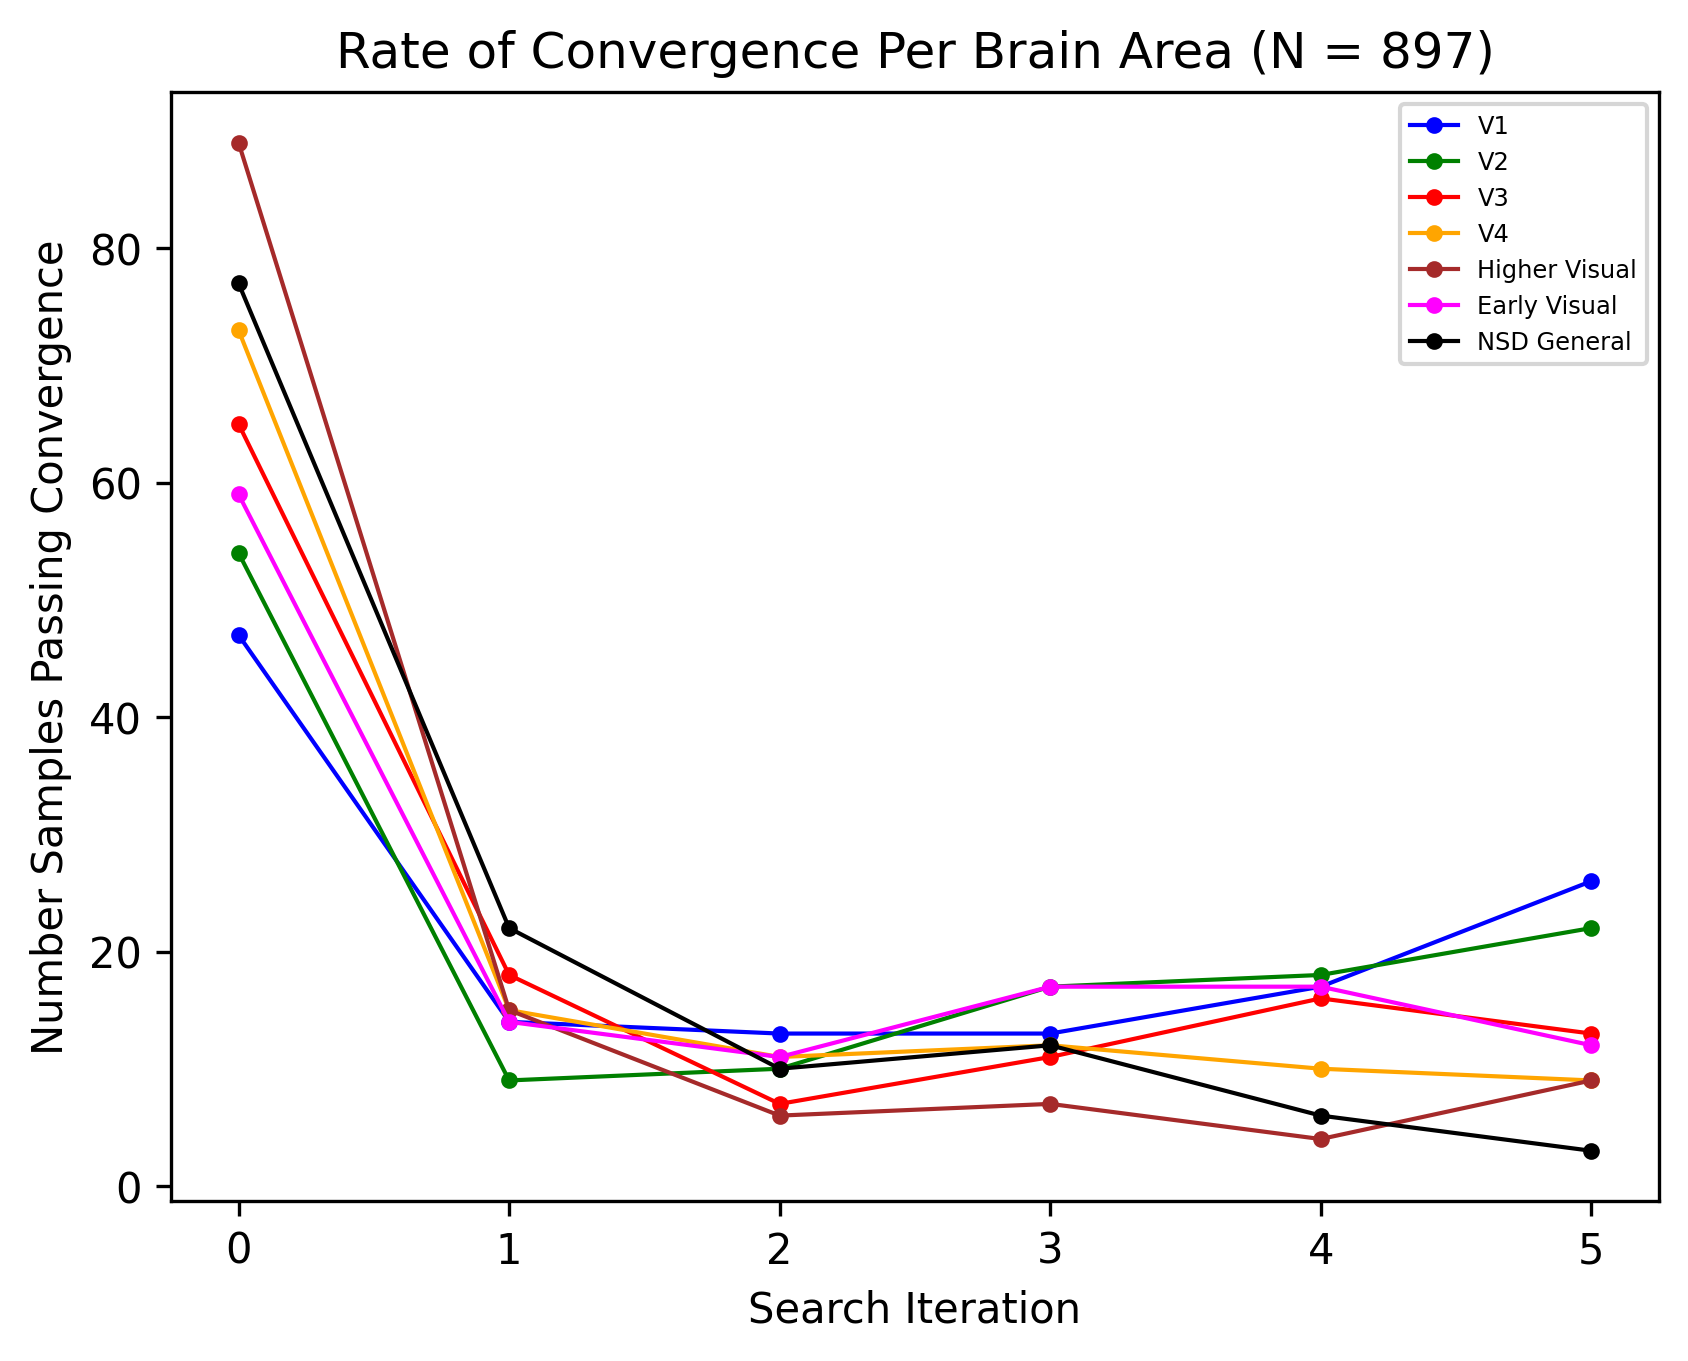

In [32]:
plt.plot(v1_iter, marker='.', color = 'blue', label = 'V1', linewidth=1)
plt.plot(v2_iter, marker='.', color = 'green',label = 'V2', linewidth=1)
plt.plot(v3_iter, marker='.', color = 'red',  label = 'V3', linewidth=1)
plt.plot(v4_iter, marker='.', color = 'orange', label = 'V4', linewidth=1)
plt.plot(hv_iter, marker='.', color = 'brown', label = 'Higher Visual', linewidth=1)
plt.plot(ev_iter, marker='.',  color = 'magenta', label = 'Early Visual', linewidth=1)
plt.plot(nsd_iter, marker='.',  color = 'black', label = 'NSD General', linewidth=1)
# plt.xticks(range(len(x)), x,fontsize=9)

plt.legend(fontsize = "xx-small")
plt.xlabel("Search Iteration")
plt.ylabel("Number Samples Passing Convergence")
plt.title("Rate of Convergence Per Brain Area (N = 897)")
mpl.rcParams['figure.dpi'] = 300